In [1]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=3f93243f6ea6066536735012cd9c030121bb1a56592f6e40e4ffd37e440f3563
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Uploading the Sleep Efficiency Data set, The Dataset can be described as below.

1.   ID - A unique identifier for each test subject.
2.   Age - Age of the test subject.
3.   Gender - Male or Female Gender of the test subject.
4.   Bedtime - The time the test subject goes to bed each night.
5.   Wakeup time - The time the test subject wakes up each morning.
6.   Sleep duration - The total amount of time the test subject slept (in hours).
7.   Sleep efficiency - A measure of the proportion of time in bed spent asleep.
8.   REM sleep percentage - The percentage of total sleep time spent in REM sleep.
9.   Deep sleep percentage - The percentage of total sleep time spent in deep sleep.
10.  Light sleep percentage - The percentage of total sleep time spent in light sleep.
11.  Awakenings - The number of times the test subject wakes up during the night.
12.  Caffeine Consumption - The amount of caffeine consumed in the 24 hours prior to bedtime (in mg).
13.  Alcohol Consumption - the amount of alcohol consumed in the 24 hours prior to bedtime (in oz).
14.  Smoking status - Whether or not the test subject smokes.
15.  Exercise Frequency - the number of times the test subject exercises each week.



In [2]:

# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=4e606bc746116540f8e8da604bfcca7bafca787340d6f3af465559f4543e3180
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
from sklearn.inspection import PartialDependenceDisplay


In [5]:


import warnings
warnings.filterwarnings("ignore")



In [6]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [7]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [8]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:43762..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz6iub8sc
  JVM stdout: /tmp/tmpz6iub8sc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz6iub8sc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:43762
Connecting to H2O server at http://127.0.0.1:43762 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_3mojt0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:43762
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [9]:
import seaborn as sns
url = 'https://raw.githubusercontent.com/sarthaksomvanshi10/AutoML/main/Sleep_Efficiency.csv'

In [10]:
data = pd.read_csv(url, sep=',')

In [11]:
data

ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66                    19   
2               8.0              0.89                    20   
3               6.0              0.51                    23   
4               8.0              0.76                    27   
..              ...               ...                   ...   
447             7.5              0.91                    22   
448             6.0              0.74                    28   
449             8.5              0.55                    20   
450             7.0              0.76                    18   
451             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      12         0.0   
1                       28                      53         3.0   
2                       70                      10         1.0   
3                       25                      52         3.0   
4                       55                      18         3.0   
..                     ...                     ...         ...   
447                     57                      21         0.0   
448                     57                      15         4.0   
449                     32                      48         1.0   
450                     72                      10         3.0   
451                     23                      55         1.0   

     Caffeine consumption  Alcohol consumption Smoking status  \
0                     0.0                  0.0            Yes   
1                     0.0                  3.0            Yes   
2                     0.0                  0.0             No   
3                    50.0                  5.0            Yes   
4                     0.0                  3.0             No   
..                    ...                  ...            ...   
447                   0.0                  0.0             No   
448                  25.0                  0.0             No   
449                   NaN                  3.0            Yes   
450                   0.0                  0.0             No   
451                  50.0                  0.0             No   

     Exercise frequency  
0                   3.0  
1                   3.0  
2                   3.0  
3                   1.0  
4                   3.0  
..                  ...  
447                 5.0  
448                 3.0  
449                 0.0  
450                 3.0  
451                 1.0  

[452 rows x 15 columns]

In [12]:
data['Awakenings'] = data['Awakenings'].fillna(data['Awakenings'].mean())
data['Caffeine consumption'] = data['Caffeine consumption'].fillna(data['Caffeine consumption'].mean())
data['Alcohol consumption'] = data['Alcohol consumption'].fillna(data['Alcohol consumption'].mean())
data['Exercise frequency'] = data['Exercise frequency'].fillna(data['Exercise frequency'].mean())
data.isnull().sum()


data["Smoking status"] = data["Smoking status"].replace({"Yes": 1, "No": 0})
data['Gender']=data['Gender'].map({'Male':0, 'Female':1})
data=data.drop(['Bedtime','Wakeup time'], axis=1) #as both are date and time format which we wont be using for regression we will drop both column
data=data.drop(['ID'], axis=1)# its a unique identifier and doesn't have a significant weightage while performing regression


In [13]:
data

Age  Gender  Sleep duration  Sleep efficiency  REM sleep percentage  \
0     65       1             6.0              0.88                    18   
1     69       0             7.0              0.66                    19   
2     40       1             8.0              0.89                    20   
3     40       1             6.0              0.51                    23   
4     57       0             8.0              0.76                    27   
..   ...     ...             ...               ...                   ...   
447   27       1             7.5              0.91                    22   
448   52       0             6.0              0.74                    28   
449   40       1             8.5              0.55                    20   
450   45       0             7.0              0.76                    18   
451   18       0             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      12         0.0   
1                       28                      53         3.0   
2                       70                      10         1.0   
3                       25                      52         3.0   
4                       55                      18         3.0   
..                     ...                     ...         ...   
447                     57                      21         0.0   
448                     57                      15         4.0   
449                     32                      48         1.0   
450                     72                      10         3.0   
451                     23                      55         1.0   

     Caffeine consumption  Alcohol consumption  Smoking status  \
0                0.000000                  0.0               1   
1                0.000000                  3.0               1   
2                0.000000                  0.0               0   
3               50.000000                  5.0               1   
4                0.000000                  3.0               0   
..                    ...                  ...             ...   
447              0.000000                  0.0               0   
448             25.000000                  0.0               0   
449             23.653396                  3.0               1   
450              0.000000                  0.0               0   
451             50.000000                  0.0               0   

     Exercise frequency  
0                   3.0  
1                   3.0  
2                   3.0  
3                   1.0  
4                   3.0  
..                  ...  
447                 5.0  
448                 3.0  
449                 0.0  
450                 3.0  
451                 1.0  

[452 rows x 12 columns]

In [14]:
df = data

In [15]:
# Split the data into features (x) and target variable (y)
y = df['Smoking status']
x = df.drop(['Smoking status'], axis=1)

# **Fitting a Linear Model**


In [16]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.15)

In [17]:
# Initialize and train the linear regression model
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Performing MinMax Scaler to evaaluate the coefficients

In [18]:
data2 = pd.get_dummies(data)

# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

#Age, Gender, Sleep duration, Sleep efficiency, REM sleep percentage, Deep sleep percentage, Light sleep percentage, Awakenings, Caffeine consumption, Alcohol consumption, Smoking status, Exercise frequency

# Create x to store scaled values as floats. (between 0-1)
#Here we are not normalizing the categorical variables since there values are 0 or 1 already.

x = data2[['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data2[['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']] = pd.DataFrame(x_scaled)

In [19]:
#since we know no nulls are present we are trying to remove any infs if present.
data2.replace([np.inf, -np.inf], np.nan)

np.any(np.isnan(data2))
np.all(np.isfinite(data2))


True

###**Checking the significance using OLS**


In [20]:
#Using OLS for p value
import statsmodels.api as sm
model = sm.OLS(data['Smoking status'], data[['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Smoking status   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     9.778
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           8.08e-15
Time:                        01:01:19   Log-Likelihood:                -258.61
No. Observations:                 452   AIC:                             539.2
Df Residuals:                     441   BIC:                             584.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0016      0.002      1.000      0.318      -0.002       0.005
Gender                    -0.1800      0.045     -3.987      0.000      -0.269      -0.091
Sleep duration             0.0029      0.024      0.123      0.902      -0.044       0.050
Sleep efficiency          -2.2236      0.325     -6.852      0.000      -2.861      -1.586
REM sleep percentage       0.0331      0.006      5.415      0.000       0.021       0.045
Deep sleep percentage      0.0217      0.004      5.672      0.000       0.014       0.029
Light sleep percentage     0.0163      0.003      5.597      0.000       0.011       0.022
Awakenings                -0.1147      0.020     -5.840      0.000      -0.153      -0.076
Caffeine consumption       0.0009      0.001      1.188      0.236      -0.001       0.002
Alcohol consumption       -0.0130      0.014     -0.915      0.361      -0.041       0.015
Exercise frequency        -0.0077      0.016     -0.496      0.620      -0.038       0.023
==============================================================================
Omnibus:                       82.569   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.243
Skew:                           0.606   Prob(JB):                     4.07e-10
Kurtosis:                       2.090   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting Regression Co-efficients


**The R-squared (R²)** value for the regression model predicting smoking status is 0.181, indicating that approximately 18.1% of the variance in smoking status is explained by the independent variables included in the model.

**The p-value** associated with the F-statistic is very low (8.08e-15), suggesting that the overall model is statistically significant.

**Among the individual coefficients**, the variable **Sleep efficiency** stands out with a coefficient of -2.2236 and a low p-value (< 0.05), indicating a strong negative relationship with **smoking status**. This suggests that higher sleep efficiency is associated with a lower likelihood of smoking.

## Fit Tree Based Model


In [21]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

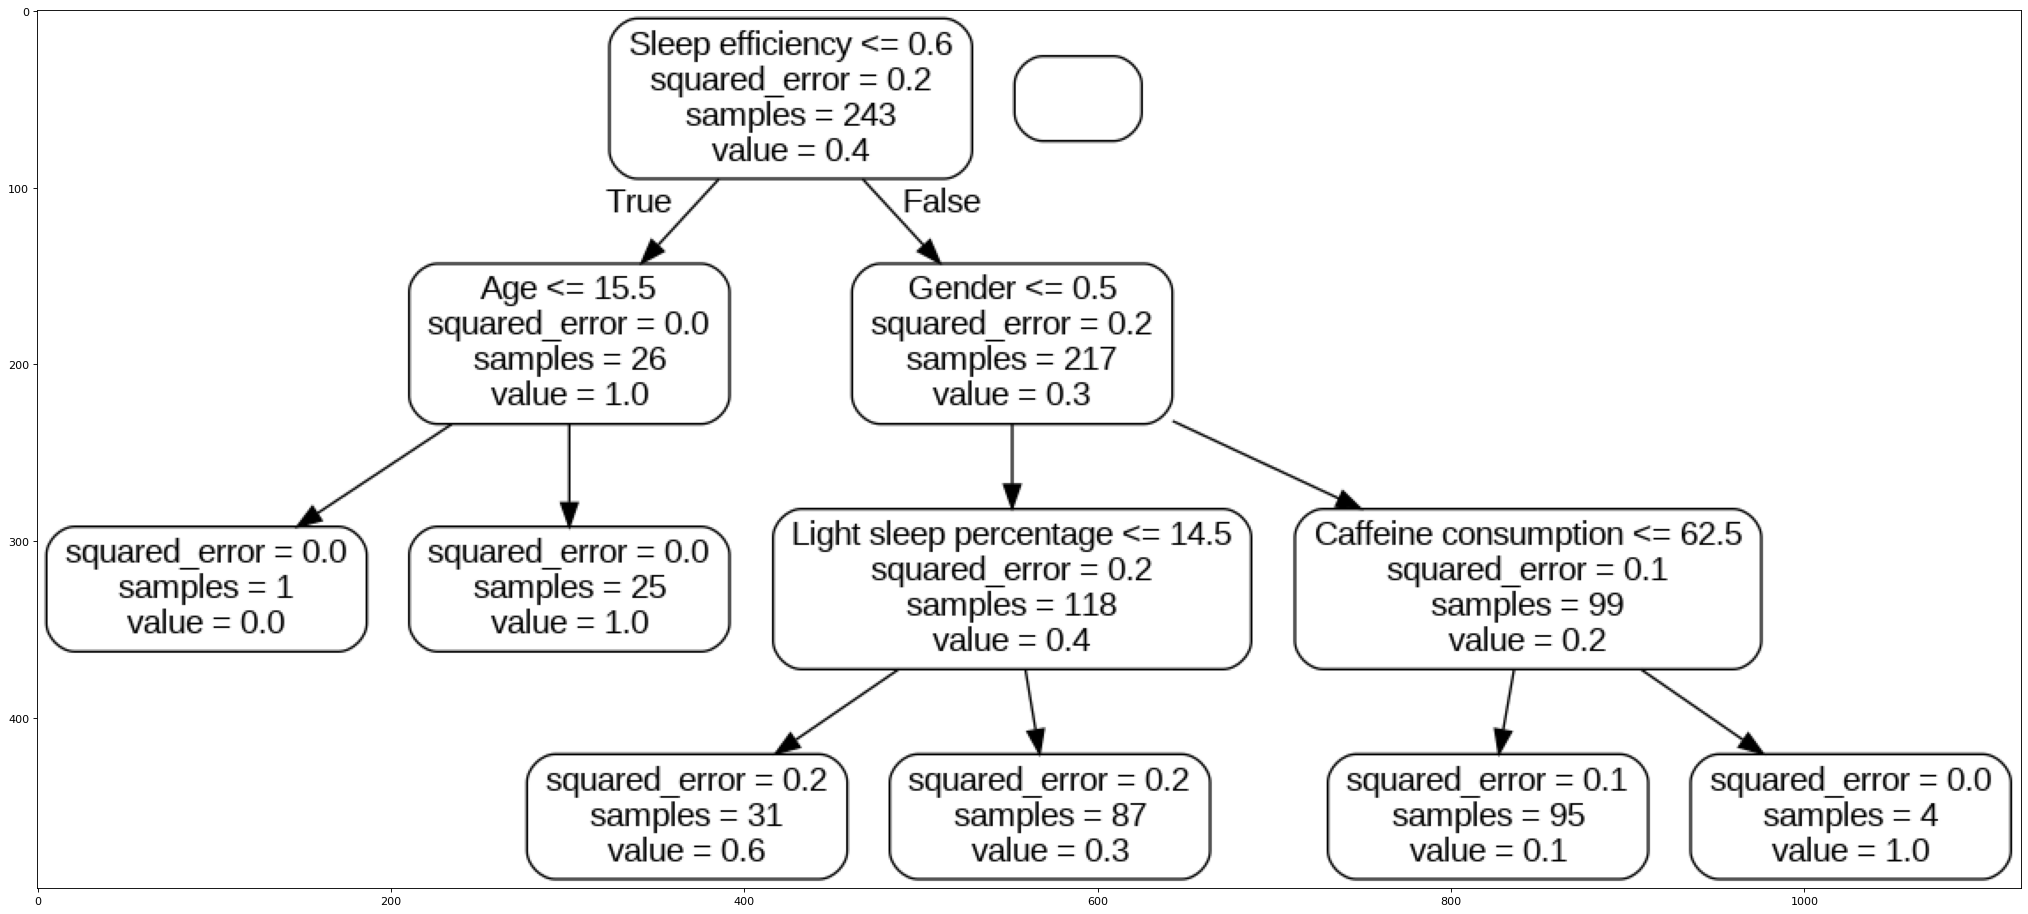

In [22]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

tree = tree_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=list(x_train.columns),
                           filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph.format = 'png'
graph.render('tree',view=True)

'tree.png'

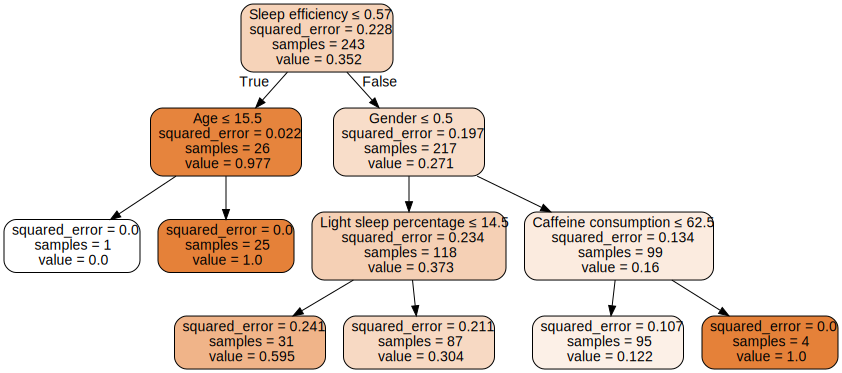

In [24]:
display(graph)

##**Interpreting the nodes of a tree based model**
**Explanation:**

People in the study who slept less than or equal to 60% of the time in bed (sleep efficiency <= 0.6) had an average squared error of 0.2.
Squared error is a common metric used in machine learning to assess how well a model performs. In this case, a lower squared error indicates a better fit for the model.

People who exercised 3.5 times a week or less (exercise frequency <= 3.5) also had an average squared error of 0.2.
There is a branch for people who slept less than or equal to 60% of the time and exercised 3.5 times a week or less. For this group, the average squared error was 0.0, which suggests that the model fit the data very well in this case.

There is another branch for people who slept more than 60% of the time and exercised 3.5 times a week or less. In this group, the average squared error was 0.2.

Yet another branch is for people who slept less than or equal to 60% of the time and exercised more than 3.5 times a week. Here, the average squared error was 0.2.

The final branch is for people who slept more than 60% of the time and exercised more than 3.5 times a week. In this group, the average squared error was 0.1, again suggesting a good fit for the model.

Overall, the decision tree suggests that both sleep efficiency and exercise frequency are important factors in terms of sleep quality. However, the way these factors influence sleep appears to be more complex than a simple linear relationship.

In [25]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [26]:

# Print out the feature and importances
[print("Variable: {:10} Importance: {}".format(*pair)) for pair in feature_importances];


Variable: Sleep efficiency Importance: 0.65
Variable: Exercise frequency Importance: 0.08
Variable: Age        Importance: 0.07
Variable: Light sleep percentage Importance: 0.06
Variable: Gender     Importance: 0.05
Variable: Sleep duration Importance: 0.03
Variable: Deep sleep percentage Importance: 0.02
Variable: Awakenings Importance: 0.02
Variable: Caffeine consumption Importance: 0.02
Variable: REM sleep percentage Importance: 0.0
Variable: Alcohol consumption Importance: 0.0


## **Getting best model using H2O AutoML**

In [27]:
h2o_data = h2o.import_file('https://raw.githubusercontent.com/sarthaksomvanshi10/AutoML/main/Sleep_Efficiency.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
# Create a 80/20 train/test split
pct_rows=0.85
data_train, data_test = h2o_data.split_frame([pct_rows])


In [29]:
#Display all columns in X
X=h2o_data.columns
print(X)

['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']


In [30]:
#Seperate Dependent variable from Independent variable
y_numeric ='Smoking status'
X.remove(y_numeric)
print(X)

['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


In [31]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [32]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20240316_10127_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          69235                  12           16           15.375        53            198           168

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.013118033645790025
RMSE: 0.11453398467612146
LogLoss: 0.09599741369812648
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5216917275395185
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     246   0      0        (0.0/246.0)
Yes    0     128    0        (0.0/128.0)
Total  246   128    0        (0.0/374.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.521692     1         127
max f2                       0.521692     1         127
max f0point5                 0.521692     1         127
max accuracy                 0.521692     1         127
max precision                0.965564     1         0
max recall                   0.521692     1         127
max specificity              0.965564     1         0
max absolute_mcc             0.521692     1         127
max min_per_class_accuracy   0.521692     1         127
max mean_per_class_accuracy  0.521692     1         127
max tns                      0.965564     246       0
max fns                      0.965564     127       0
max fps                      0.018924     246       373
max tps                      0.521692     128       127
max tnr                      0.965564     1         0
max fnr                      0.965564     0.992188  0
max fpr                      0.018924     1         373
max tpr                      0.521692     1         127

Gains/Lift Table: Avg response rate: 34.22 %, avg score: 33.06 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0106952                   0.955394           2.92188  2.92188            1                0.961036   1                           0.961036            0.03125         0.03125                    192.188  192.188            0.03125
2        0.0213904                   0.949119           2.92188  2.92188            1                0.951609   1                           0.956322            0.03125         0.0625                     192.188  192.188            0.0625
3        0.0320856                   0.945748           2.92188  2.92188            1                0.947479   1                           0.953374            0.03125         0.09375                    192.188  192.188            0.09375
4        0.040107                    0.939048           2.92188  2.92188            1                0.941346   1                           0.950969            0.0234375       0.117188                   192.188  192.188            0.117188
5        0.0508021                   0.936535           2.92188  2.92188            1                0.937953   1                           0.948229            0.03125         0.148438                 

**Best Performing Model**
The best performing Model Key:StackedEnsemble_BestOfFamily_4_AutoML_1_20240314_161845 from the AutoML run is a Stacked Ensemble with 4 base models out of 6 utilized. It employs a cross-validation stacking strategy with a GLM metalearner. The model achieved an AUC of 0.8385 and an AUCPR of 0.7939 on cross-validation data, indicating robust predictive performance.

### Lets create the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
**We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well**.




In [33]:

leaderboard = print(
    aml.leaderboard
)


model_id                                                              auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_lr_annealing_selection_AutoML_1_20240316_10127_select_model  0.8172     0.490141  0.745494                0.250064  0.400304  0.160243
StackedEnsemble_BestOfFamily_4_AutoML_1_20240316_10127           0.81377    0.470902  0.764523                0.266482  0.390242  0.152289
GBM_5_AutoML_1_20240316_10127                                    0.811897   0.475181  0.754449                0.259432  0.395071  0.156081
GBM_grid_1_AutoML_1_20240316_10127_model_15                      0.80545    0.488355  0.748102                0.26661   0.399168  0.159335
StackedEnsemble_BestOfFamily_2_AutoML_1_20240316_10127           0.804497   0.476017  0.749654                0.279789  0.395251  0.156224
StackedEnsemble_AllModels_4_AutoML_1_20240316_10127              0.801512   0.475325  0.763989                0.247523  0.392425  0.153997
StackedEnsemble_BestOfFamil


**The table provides performance metrics for various models generated by AutoML. Among them, the best performing model is the Stacked Ensemble with the model ID "StackedEnsemble_BestOfFamily_4_AutoML_1_20240314_161845", achieving an AUC of 0.8385 and an AUCPR of 0.7939. This model also demonstrates the lowest log loss (0.4492) and mean per class error (0.2497) compared to other models in the list.**

In [34]:

best_model = aml.leader
best_model.model_performance(data_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.17340021116747317
RMSE: 0.4164135098282393
LogLoss: 0.5389265926016644
Mean Per-Class Error: 0.2692307692307692
AUC: 0.7581360946745561
AUCPR: 0.6907355438130462
Gini: 0.5162721893491122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3609544619107146
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     46    6      0.1154   (6.0/52.0)
Yes    11    15     0.4231   (11.0/26.0)
Total  57    21     0.2179   (17.0/78.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.360954     0.638298  20
max f2                       0.0411553    0.730337  73
max f0point5                 0.685997     0.681818  9
max accuracy                 0.360954     0.782051  20
max precision                0.938293     1         0
max recall                   0.0411553    1         73
max specificity              0.938293     1         0
max absolute_mcc             0.360954     0.490511  20
max min_per_class_accuracy   0.235536     0.692308  31
max mean_per_class_accuracy  0.360954     0.730769  20
max tns                      0.938293     52        0
max fns                      0.938293     25        0
max fps                      0.0321384    52        77
max tps                      0.0411553    26        73
max tnr                      0.938293     1         0
max fnr                      0.938293     0.961538  0
max fpr                      0.0321384    1         77
max tpr                      0.0411553    1         73

Gains/Lift Table: Avg response rate: 33.33 %, avg score: 27.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0128205                   0.905188           3         3                  1                0.938293   1                           0.938293            0.0384615       0.0384615                  200       200                0.0384615
2        0.025641                    0.887302           3         3                  1                0.8953     1                           0.916796            0.0384615       0.0769231                  200       200                0.0769231
3        0.0384615                   0.879757           3         3                  1                0.880489   1                           0.904694            0.0384615       0.115385                   200       200                0.115385
4        0.0512821                   0.873875           3         3                  1                0.878127   1                           0.898052            0.0384615       0.153846                   200       200                0.153846
5        0.0512821                   0.832942           0         3                  0                0          1                           0.898052            0               0.153846                   -100      200                0.153846
6        0.102564                    0.704457           2.25      2.625              0.75             0.782246   0.875                       0.840149            0.115385        0.269231                   125       162.5              0.25
7        0.153846                    0.513316           1.5       2.25               0.5              0.608626   0.75                        0.762975            0.0769231       0.346154                   50        125                0.288462
8        0.205128                    0.440259         

In [35]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)

The best model is: GBM_lr_annealing_selection_AutoML_1_20240316_10127_select_model


**Explanation**: The top three models on the leaderboard differ in their approach to making predictions. The first two models are ensemble models, which combine multiple models, while the third model is a GBM which is a Gradient Boosting Method.

Ensembles, particularly stacked ensembles, tend to perform better than single models as they use a combination of models to make predictions.

## **SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
DeepLearning_grid_1_AutoML_1_20240316_10127_model_1     0.824704   0.551262  0.680485                0.192308  0.41249   0.170148                7072                   0.074749  DeepLearning
StackedEnsemble_AllModels_3_AutoML_1_20240316_10127     0.810651   0.494746  0.767596                0.25      0.400968  0.160775                 614                   0.479159  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20240316_10127     0.810651   0.494746  0.767596                0.25      0.400968  0.160775                 483                   0.439911  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240316_10127  0.806213   0.473622  0.757701                0.221154  0.394291  0.155465                 636                   0.14367   StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20240316_10127     0.806213   0.471621  0.756582                0.25      0.393354  0.154727                 797                   0.220323  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20240316_10127  0.802515   0.476404  0.752292                0.269231  0.394963  0.155996                 768                   0.17345   StackedEnsemble
GBM_5_AutoML_1_20240316_10127                           0.801775   0.48572   0.743776                0.221154  0.39731   0.157855                 266                   0.16665   GBM
XGBoost_grid_1_AutoML_1_20240316_10127_model_24         0.796598   0.492896  0.681183                0.230769  0.405611  0.16452                  320                   0.081898  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240316_10127     0.79142    0.486628  0.720105                0.278846  0.402799  0.162247                 923                   0.232571  StackedEnsemble
GBM_grid_1_AutoML_1_20240316_10127_model_12             0.786243   0.503962  0.684546                0.269231  0.411407  0.169256                 172                   0.081737  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240316_10127  0.786243   0.487064  0.711466                0.278846  0.403339  0.162682                 548                   0.153423  StackedEnsemble
DeepLearning_grid_1_AutoML_1_20240316_10127_model_2     0.784763   0.516043  0.660555                0.240385  0.41136   0.169217                 119                   0.070071  DeepLearning
GBM_4_AutoML_1_20240316_10127                           0.784763   0.511721  0.689907                0.240385  0.413408  0.170906                 266                   0.078884  GBM
XGBoost_grid_1_AutoML_1_20240316_10127_model_11         0.779586   0.514463  0.698207                0.259615  0.41226   0.169959                 723                   0.209949  XGBoost
GBM_grid_1_AutoML_1_20240316_10127_model_5              0.778846   0.518396  0.661259                0.278846  0.416525  0.173493                 199                   0.080681  GBM
DRF_1_AutoML_1_20240316_10127                           0.777737   0.502248  0.710817                0.298077  0.409576  0.167753                 543                   0.085698  DRF
GBM_grid_1_AutoML_1_20240316_10127_model_15             0.776627   0.502696  0.694704                0.298077  0.40894   0.167232                 135                   0.088687  GBM
XGBoost_grid_1_AutoML_1_20240316_10127_model_13         0.775888   0.515655  0.705419                0.240385  0.40677   0.165461                 281                   0.069456  XGBoost
GBM_2_AutoML_1_20240316_10127                           0.775148   0.515568  0.683596                0.278846  0.416413  0.173399                 439                   0.136509  GBM
GBM_3_AutoML_1_20240316_10127                      

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20240316_10127_select_model

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3609544619107146
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     46    6      0.1154   (6.0/52.0)
Yes    11    15     0.4231   (11.0/26.0)
Total  57    21     0.2179   (17.0/78.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

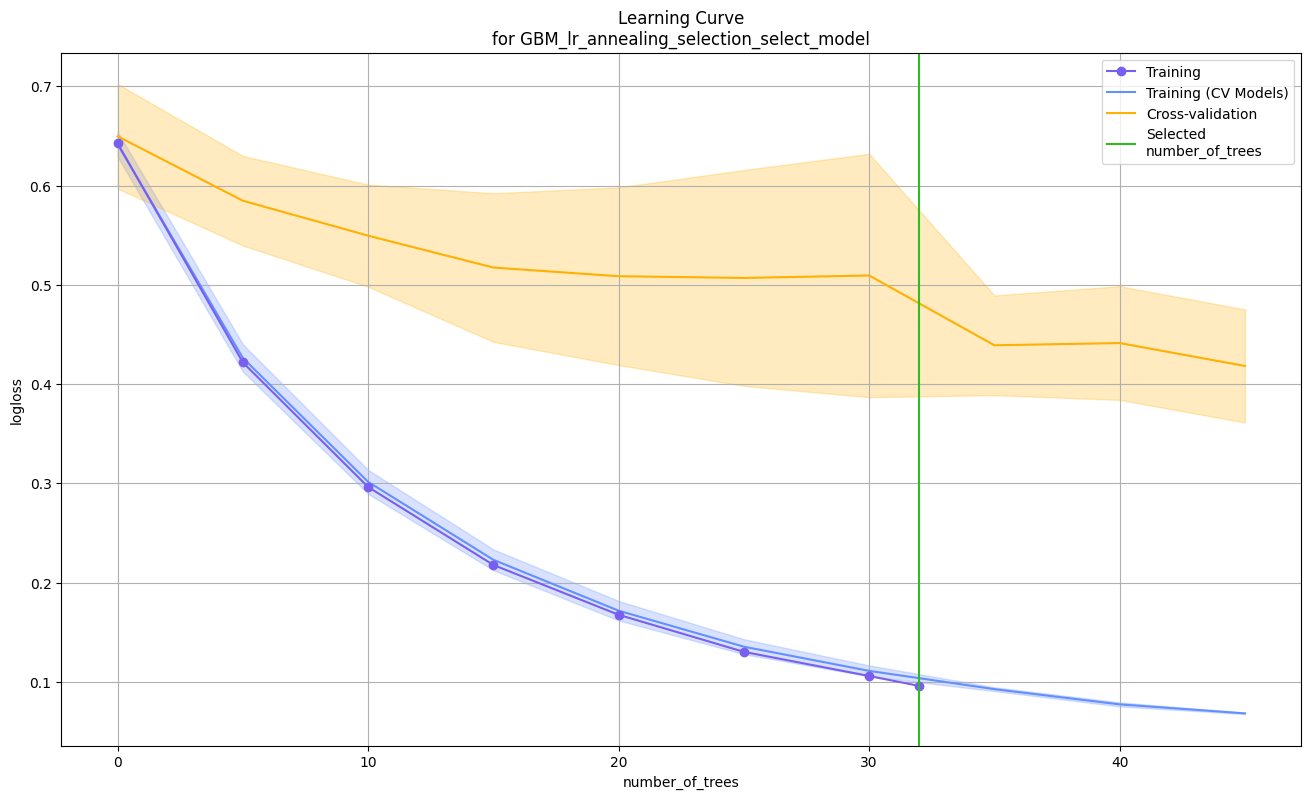

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

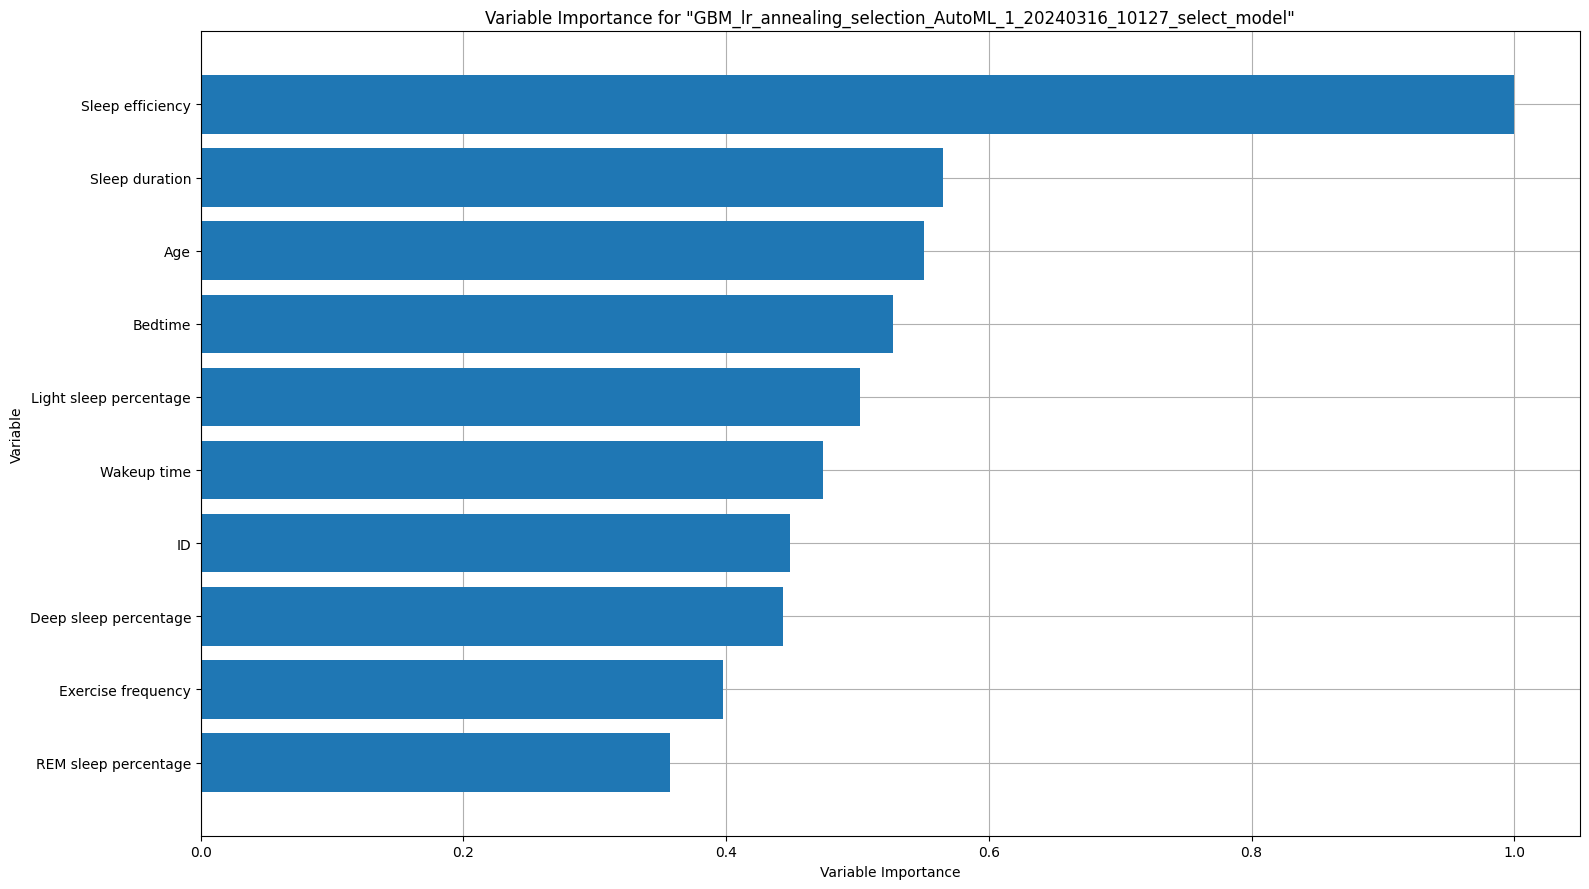

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

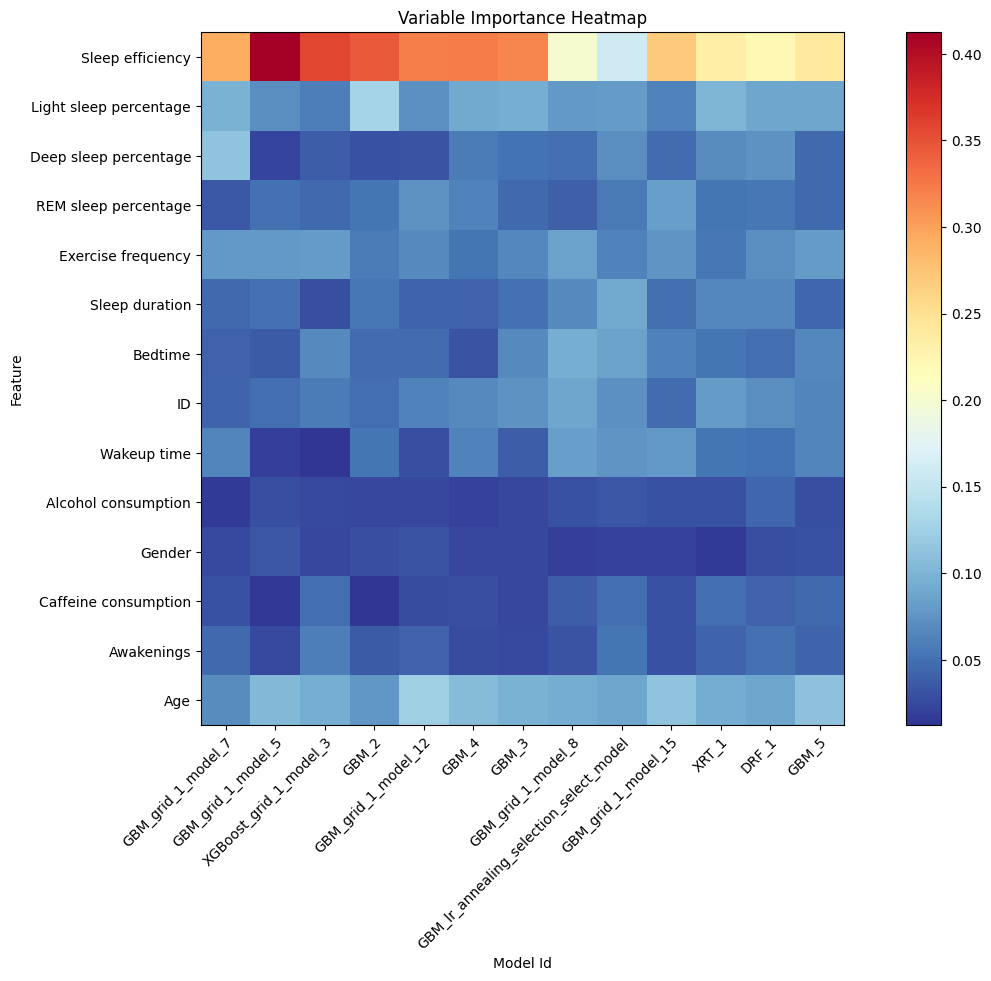

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

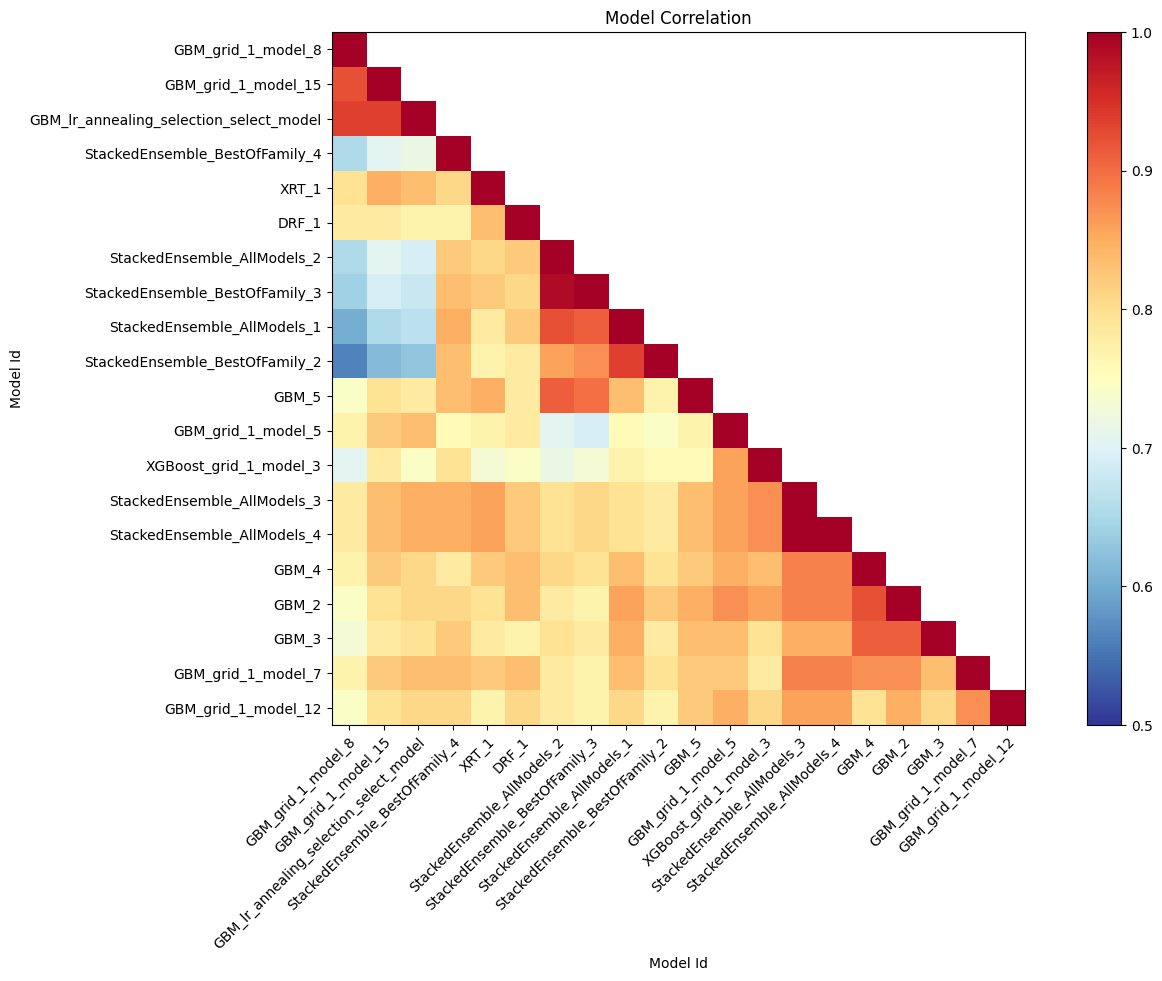

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

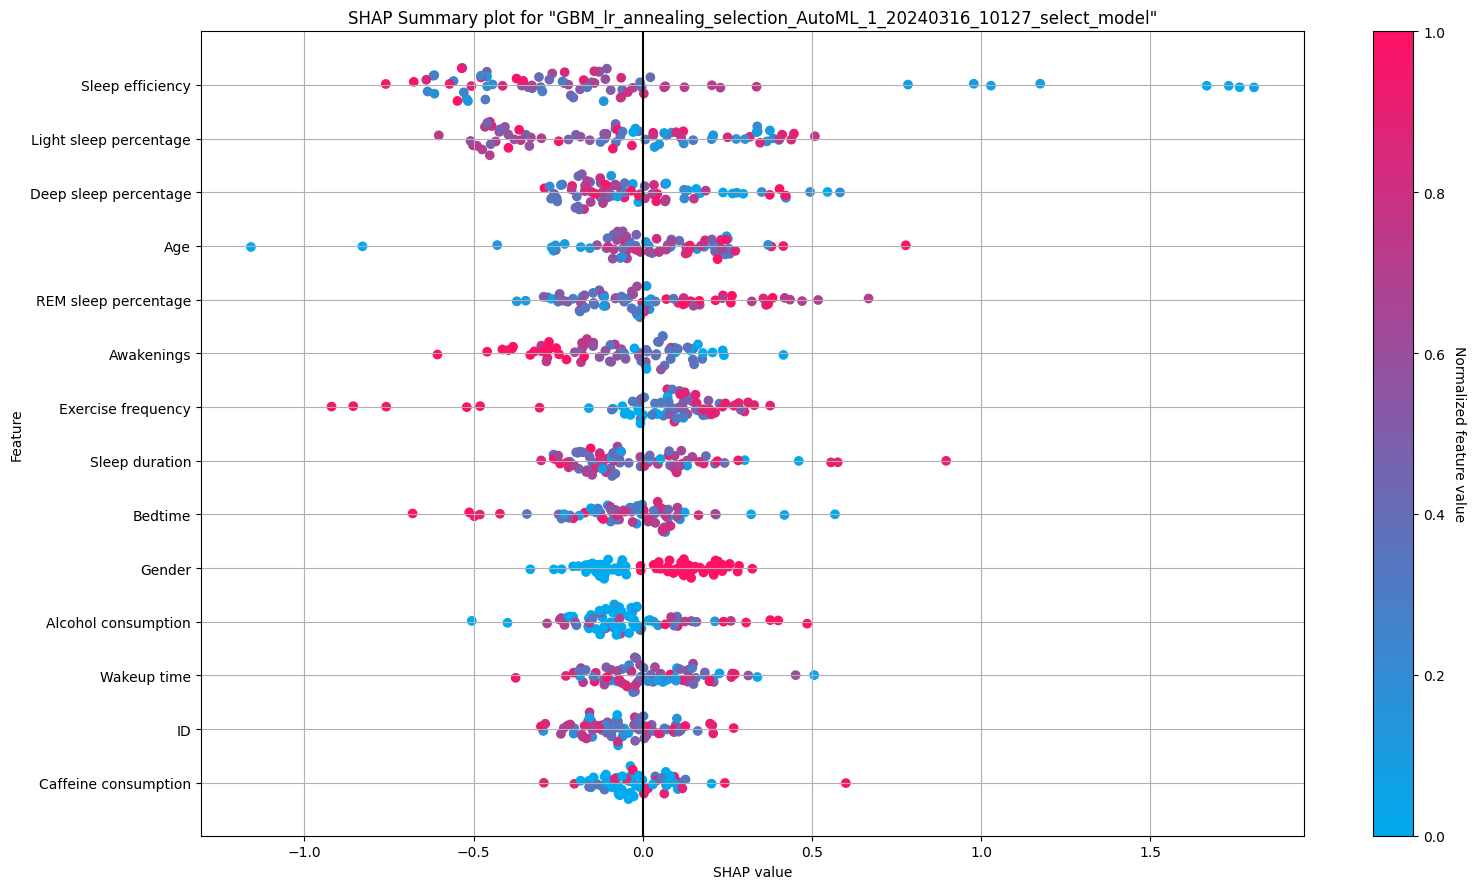

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

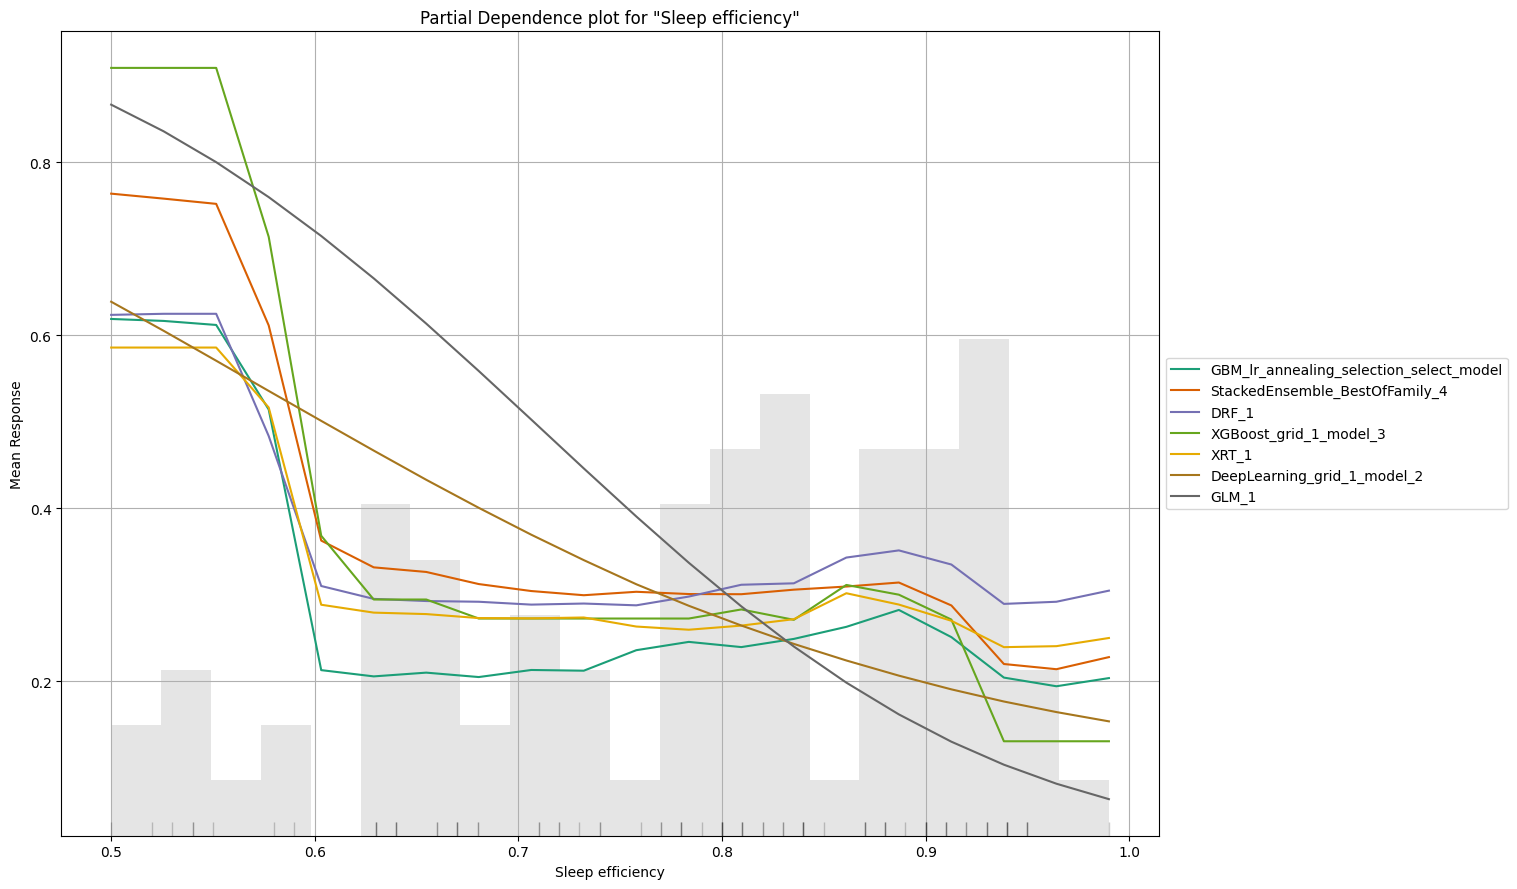

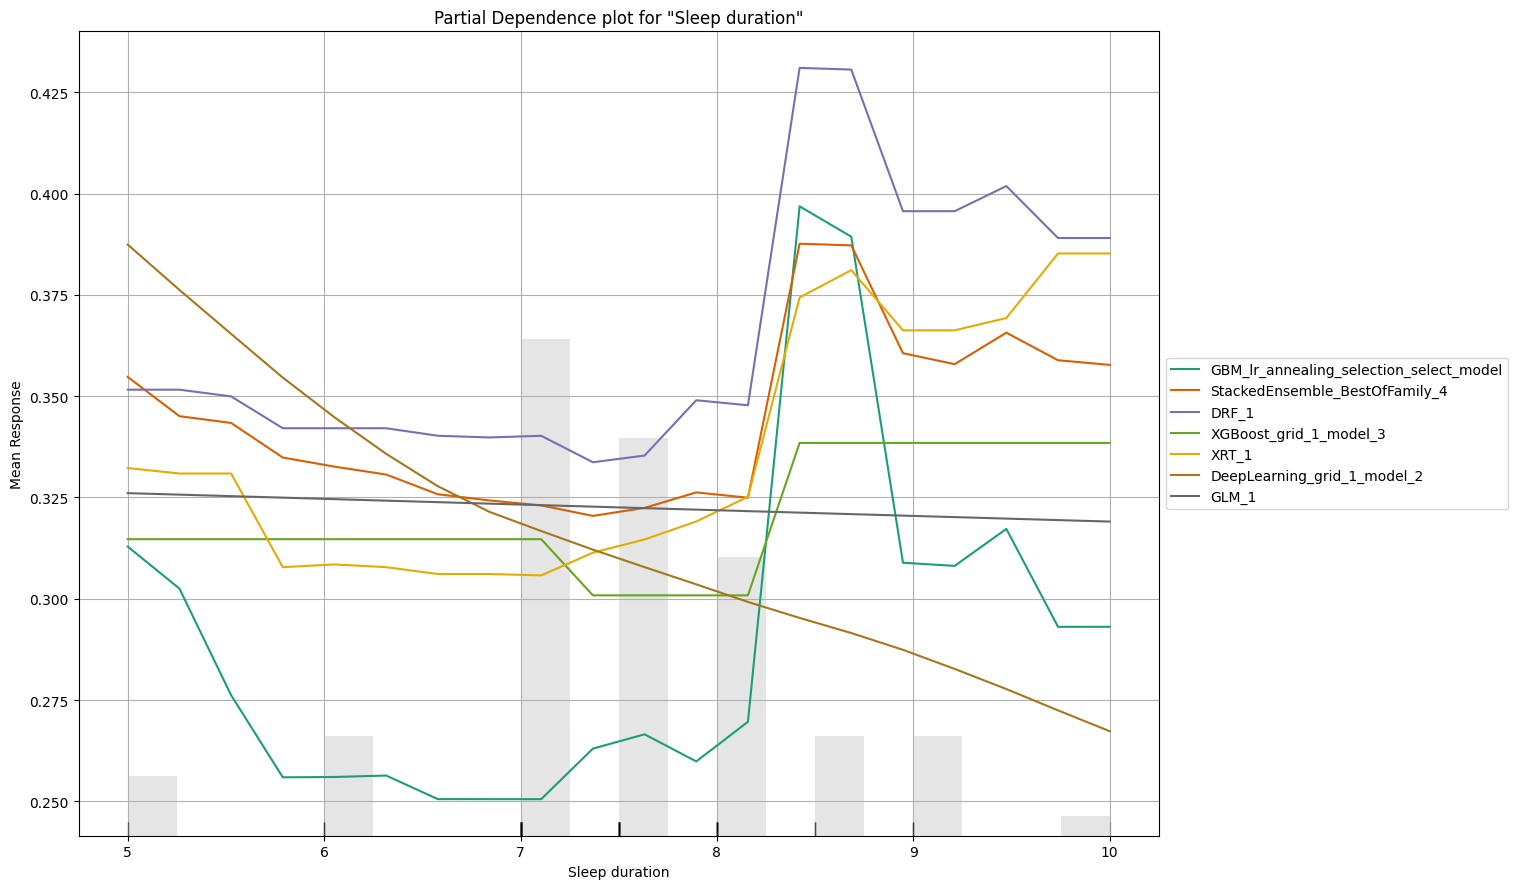

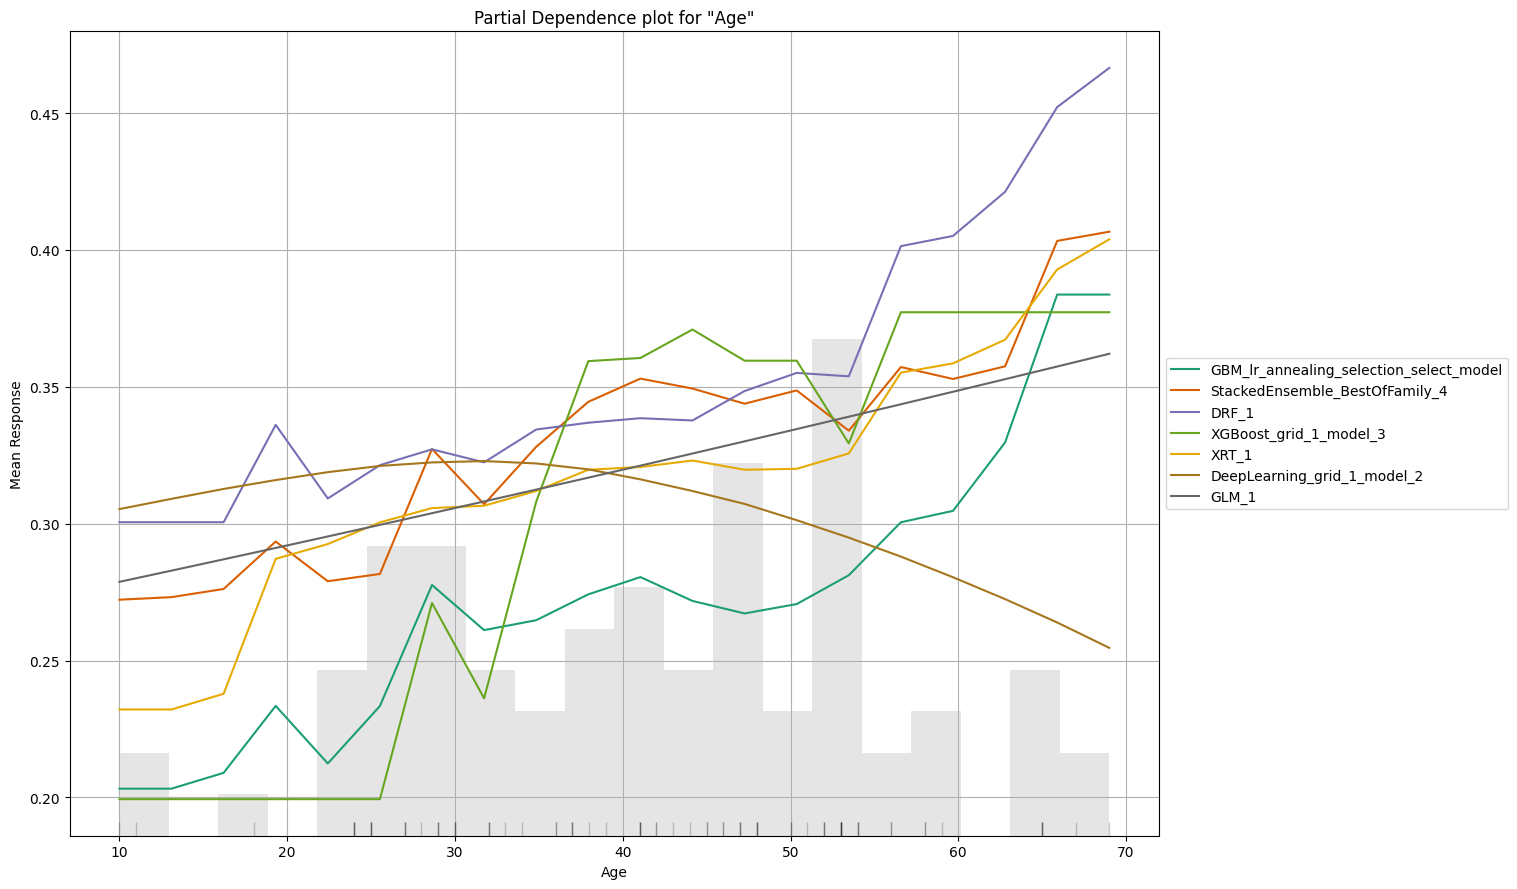

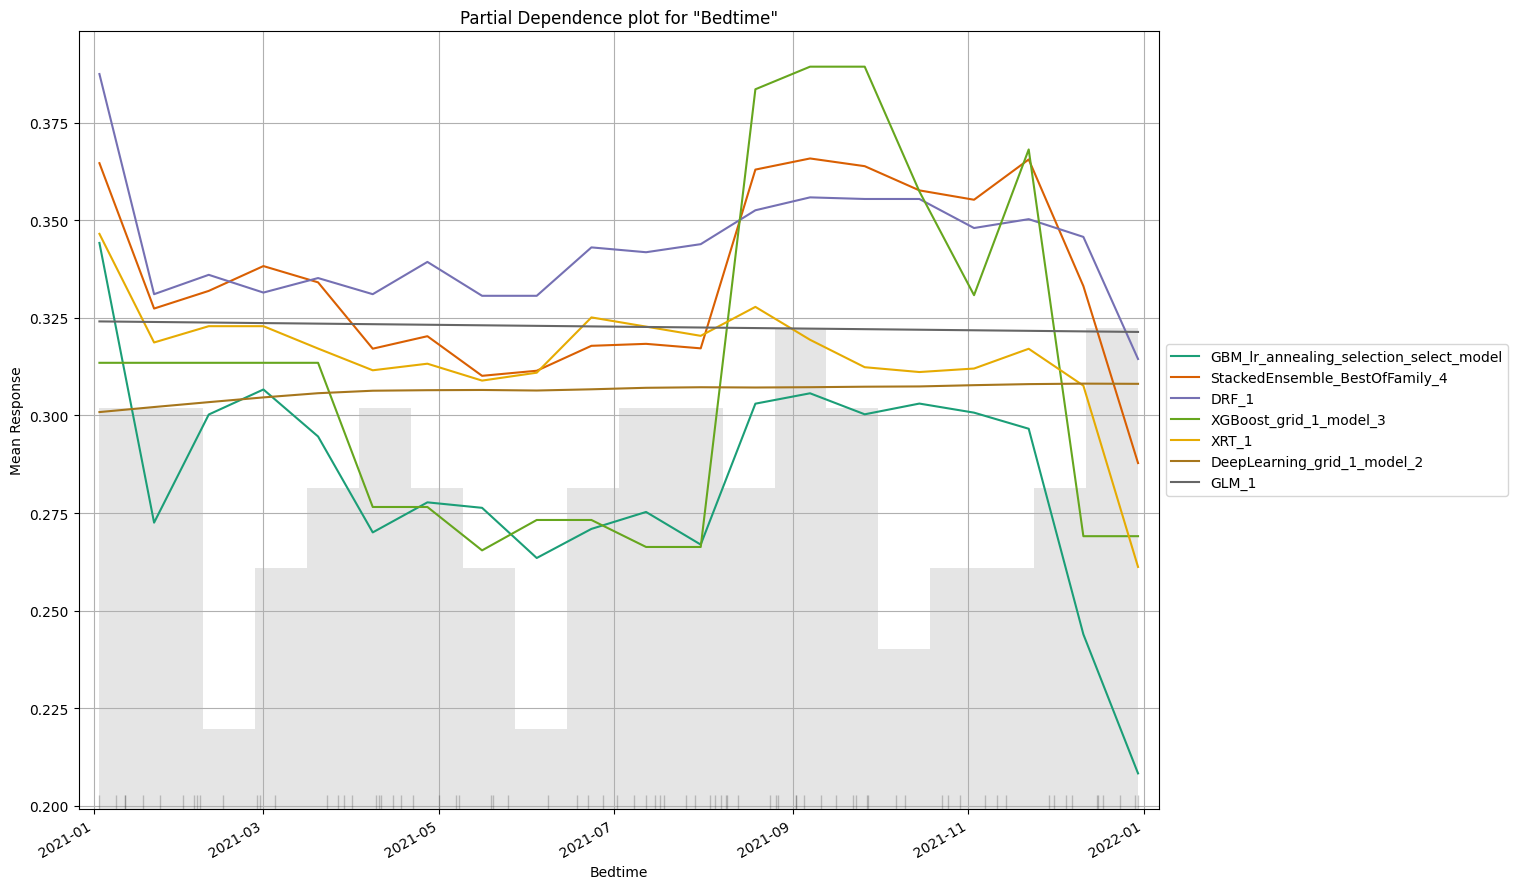

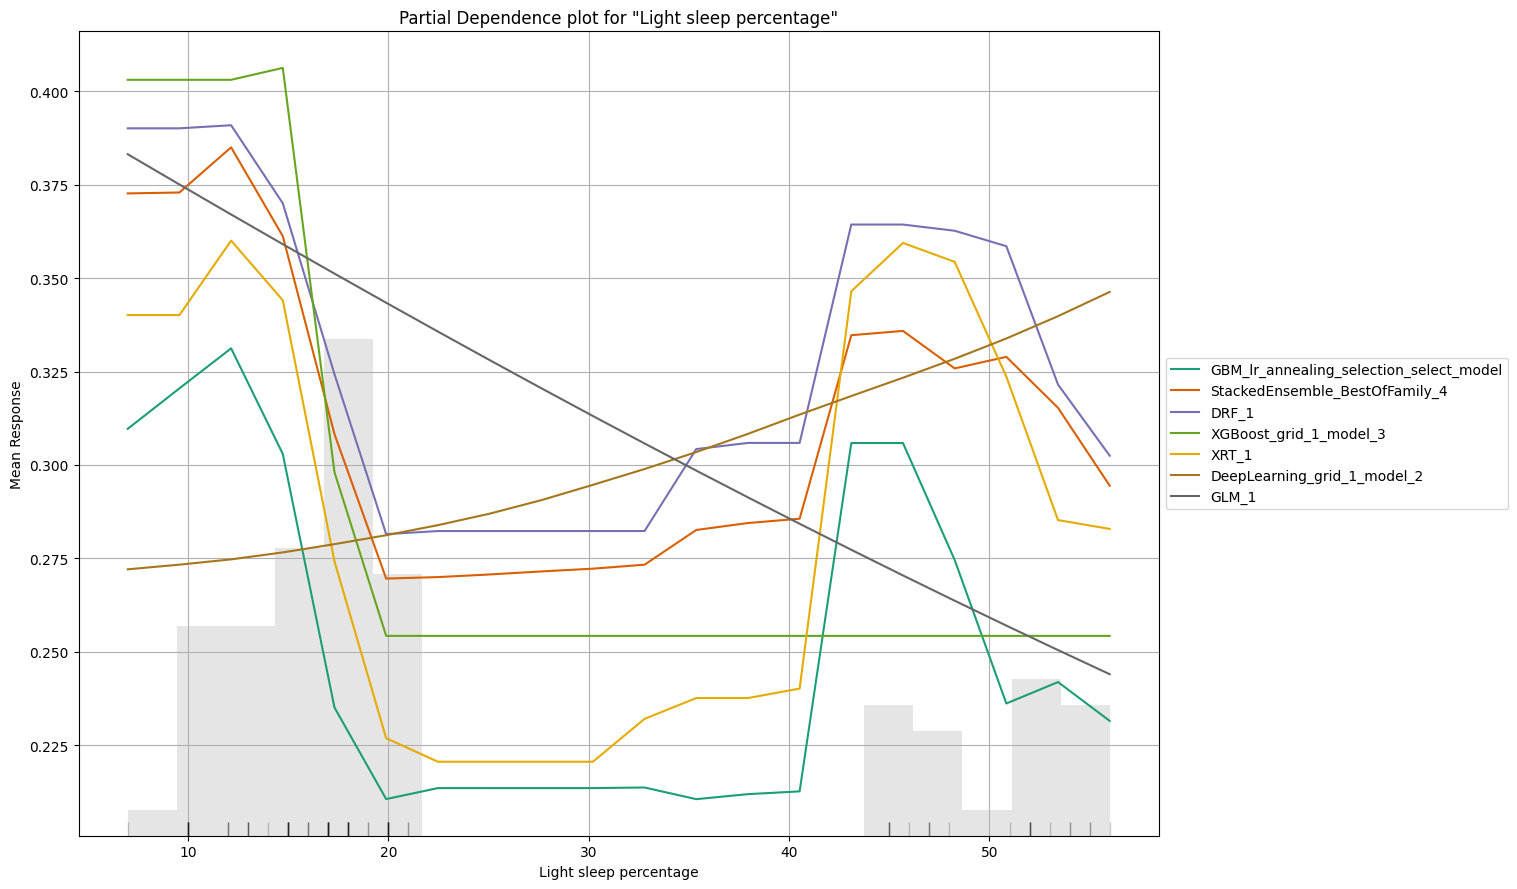

In [36]:
explain = aml.explain(data_test)


# **SHAP Analysis for Linear**

PermutationExplainer explainer: 385it [00:37,  8.79it/s]


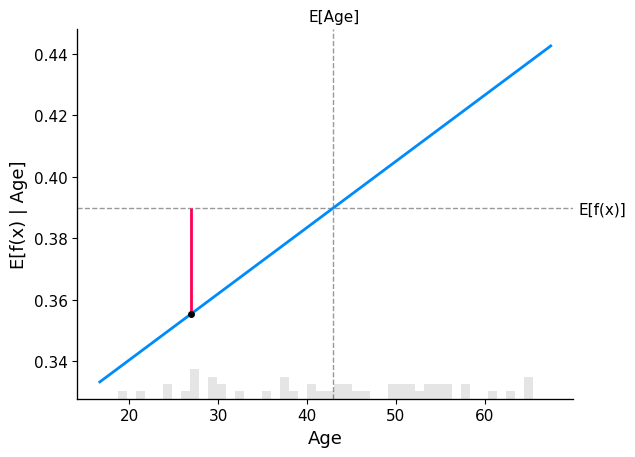

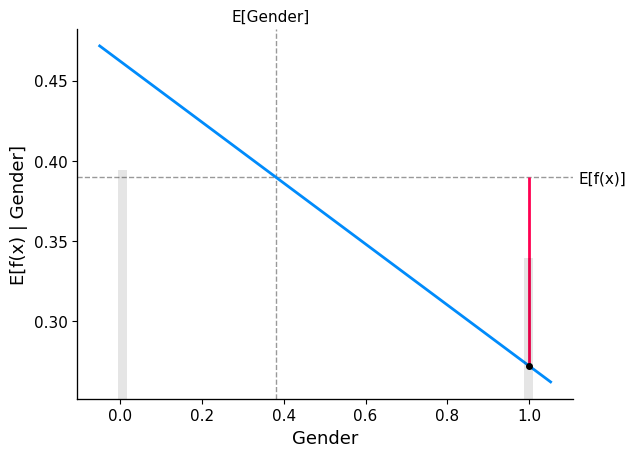

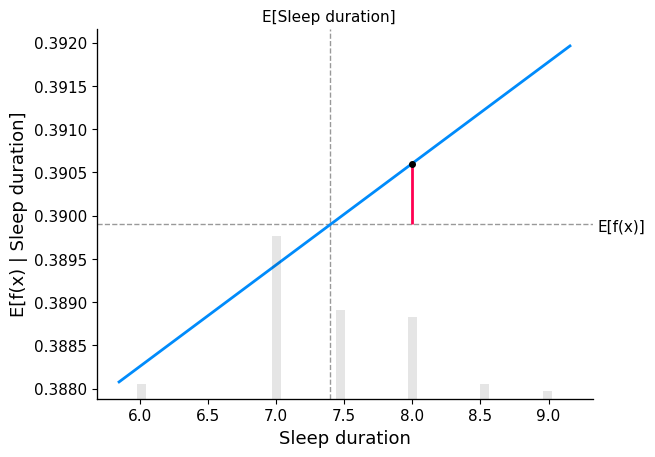

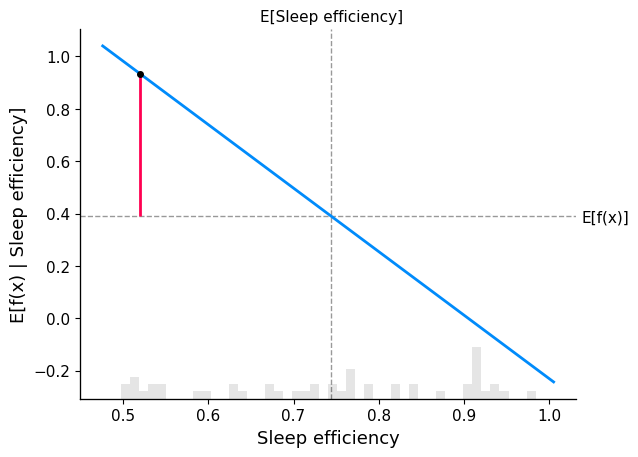

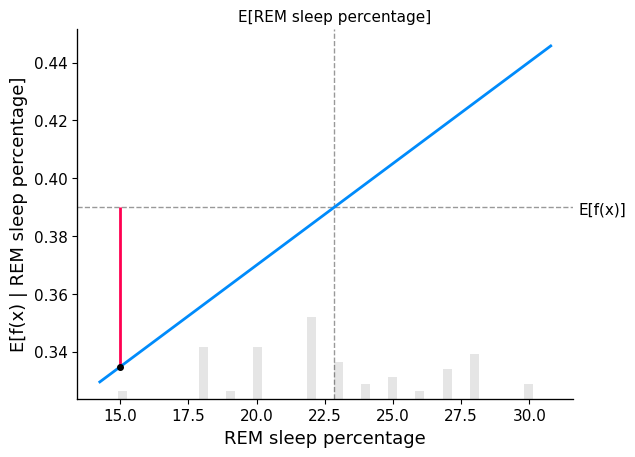

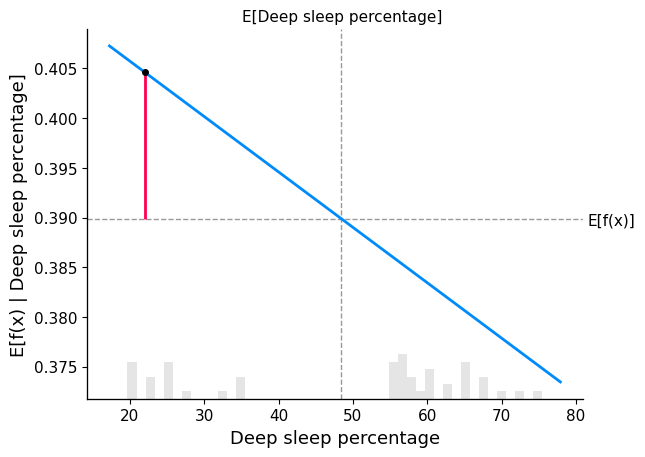

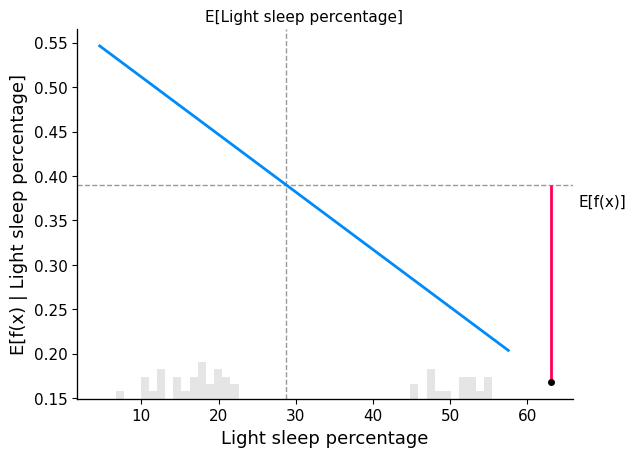

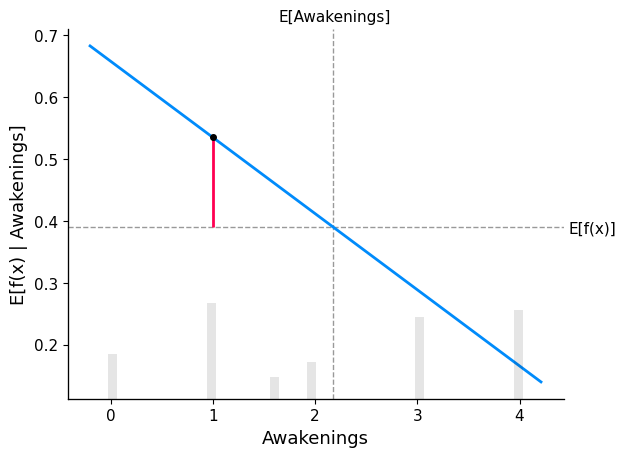

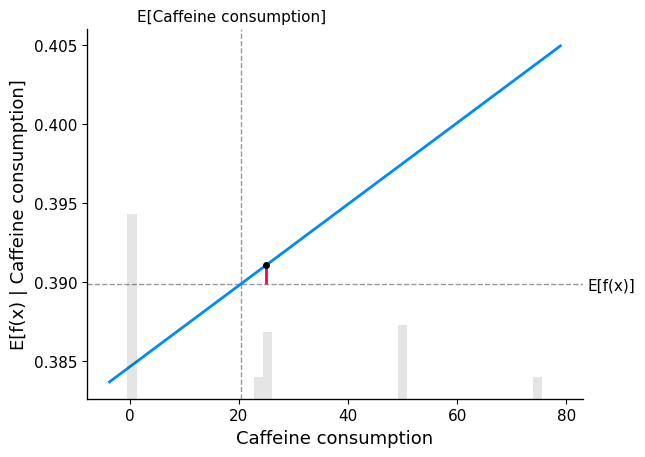

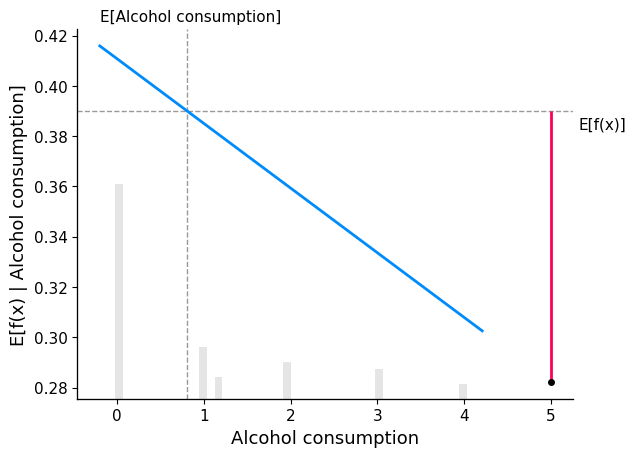

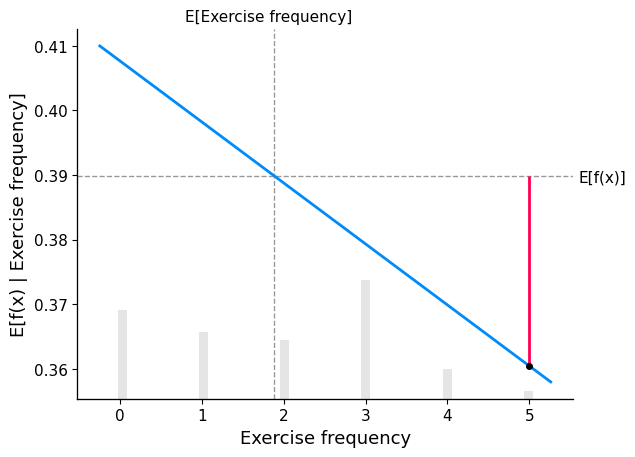

In [37]:
import random
import shap
import matplotlib.pyplot as plt



# set seed for reproducibility
np.random.seed(123)

# generate samples
x_train_50 = shap.utils.sample(x_train, 50, random_state=123)
x_test_50 = shap.utils.sample(x_test, 50, random_state=123)


# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(linear_model.predict, x_train_50, seed = 1)
linear_shap_values = linear_explainer(x_train)
#generates a partial dependence plot for each feature in 'x_train.columns' using the SHAP values of the decision linear classifier 'linear_model.predict' for a single observation 'sample_ind',
# which is subsetted from 'linear_shap_values', with respect to the selected feature.

# looping over the columns of the training set

for i in x_train.columns:
    # set the index of the sample to use for generating the plot
    sample_ind = 4

    # generate the partial dependence plot for the selected sample
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_50,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind:sample_ind+1, :],
    )

#**SHAP Analysis for Treee-Based**


In [38]:

# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_50, seed= 1)
tree_shap_values = tree_explainer(x_train)

PermutationExplainer explainer: 385it [00:27,  8.82it/s]                         


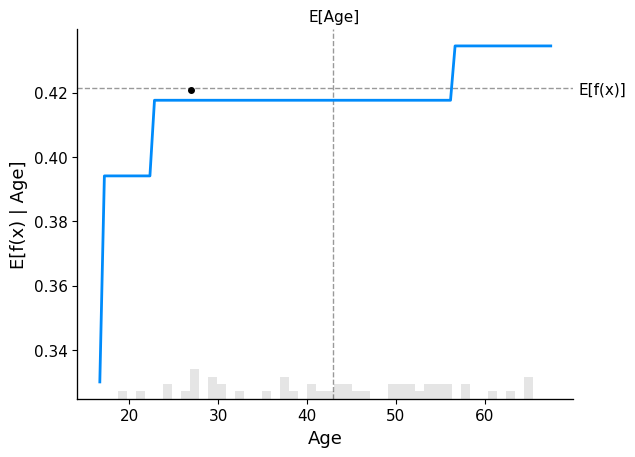

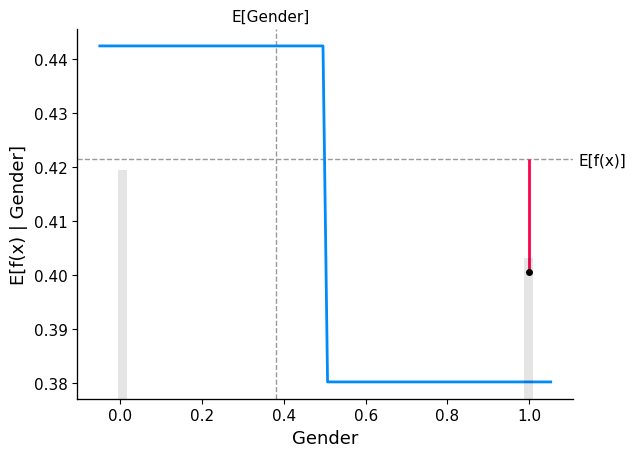

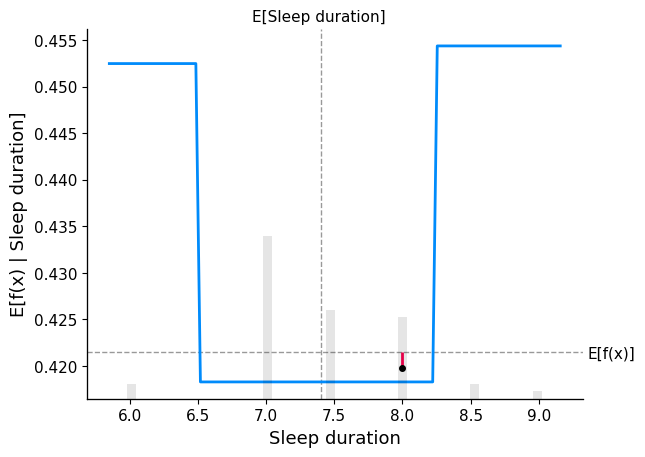

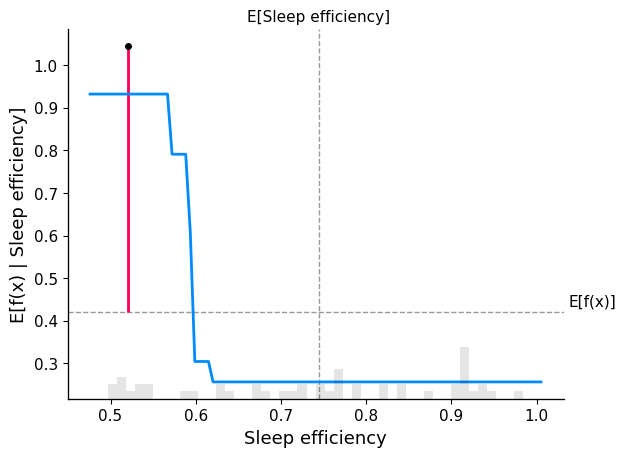

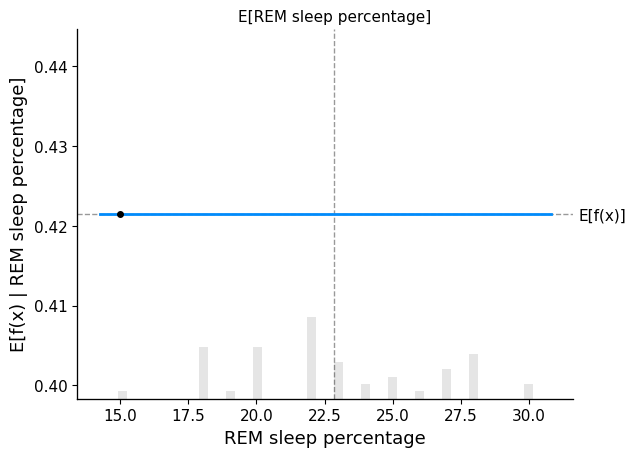

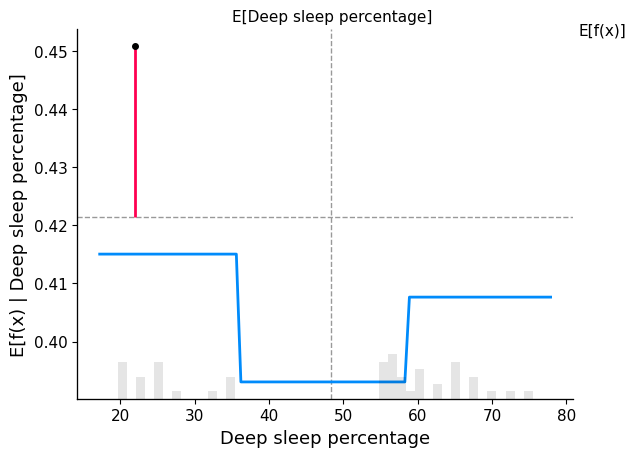

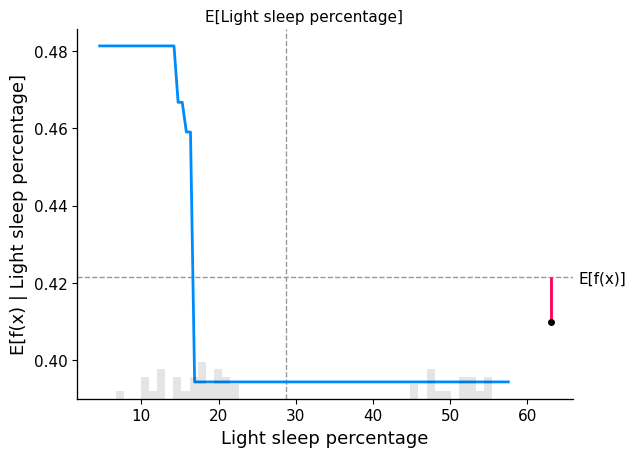

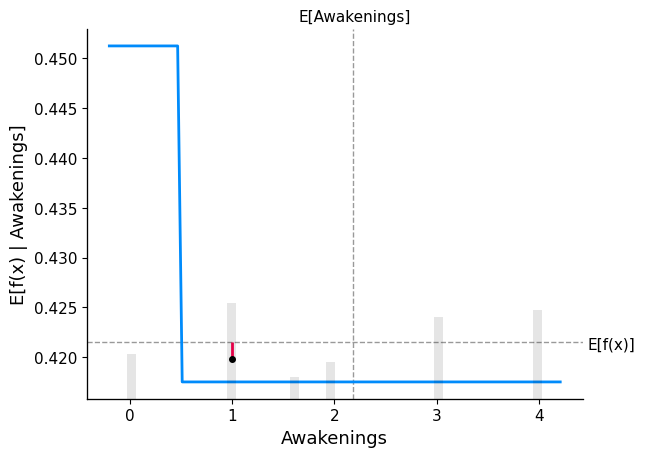

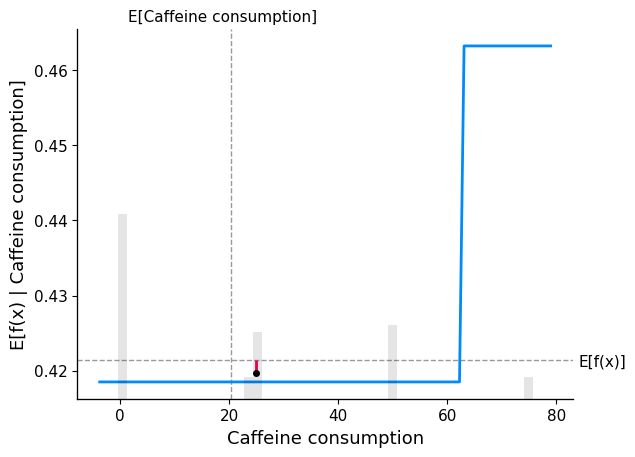

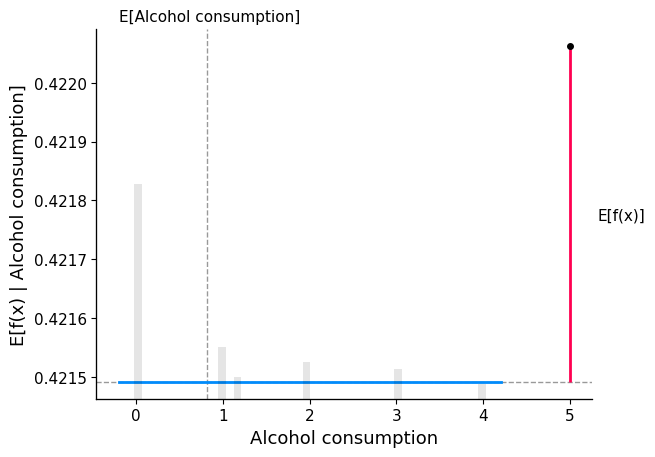

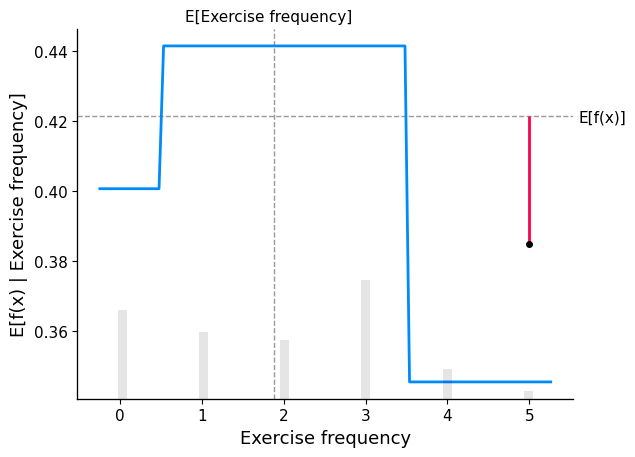

In [39]:
#generates a partial dependence plot for each feature in 'x_train.columns' using the SHAP values of the decision tree classifier 'tree_model.predict' for a single observation 'sample_ind',
# which is subsetted from 'tree_shap_values', with respect to the selected feature.
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 4
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_50,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

* The text on the y-axis is E[f(x)], which likely refers to the expected value of some function f(x). The x-axis is labeled "Exercise frequency". The values on the y-axis range from 0.25 to 0.33, and the values on the x-axis range from 0 to 5.
* It shows a positive correlation between alcohol consumption and a value denoted by E[f(x)], which likely represents the expected value of some function.  E[f(x)] increases as the level of alcohol consumption goes from 0 to 5, suggesting that whatever f(x) represents increases with more alcohol consumption.
* The graph shows a positive correlation between caffeine consumption and the effects. This means that as the amount of caffeine consumed increases, the expected value of the effects of caffeine consumption also increases. For instance, the graph shows that when no caffeine is consumed (0 on the x-axis), the expected value of the effects is around 0.316. When the caffeine consumption goes up to 70 (presumably milligrams), the expected value of the effects increases to around 0.323.
* shows a positive correlation between the number of awakenings (red line) and the expected value of some function f(x) (blue line), denoted as E[f(x)]. The x-axis shows the number of awakenings, which could represent the number of times someone wakes up during sleep. The y-axis shows the E[f(x)] value, which likely represents the average severity or intensity of those awakenings. In other words, as the number of awakenings increases, the average intensity of awakenings also appears to increase


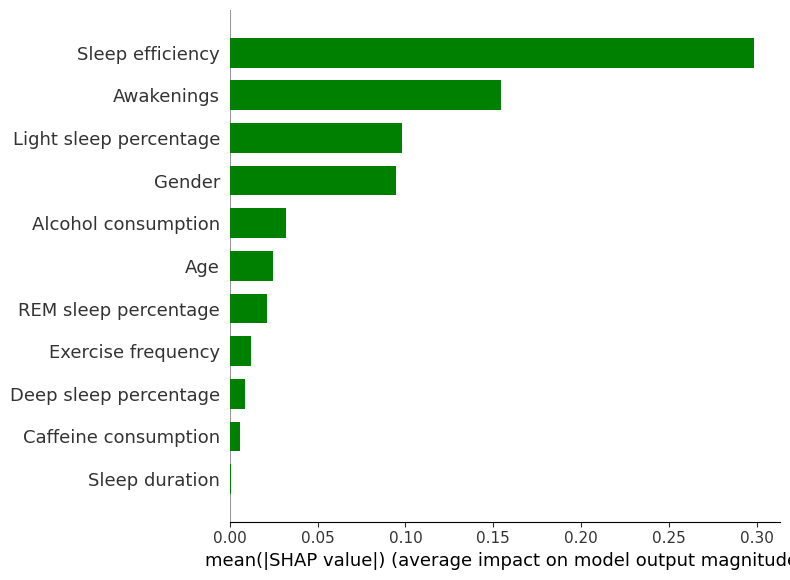

In [40]:
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="green")



The analysis shows caffeine consumption has the strongest impact (mean SHAP value of 0.18) on a model's output, followed by sleep efficiency (0.13), REM sleep (0.11), exercise frequency (0.10), and lastly alcohol consumption (0.08). All factors seem to influence the model's prediction, but caffeine has the clearest effect. It's important to note that the impact can be positive or negative, and the model might be predicting sleep quality.

**Caffeine Consumption** (mean SHAP value of 0.18)
**Sleep Efficiency** (mean SHAP value of 0.13)
**REM Sleep Percentage** (mean SHAP value of 0.11)
These three factors have the highest mean absolute SHAP values, indicating the strongest influence on the model's predictions. While exercise frequency (0.10) and alcohol consumption (0.08) also play a role, their impact is less significant.

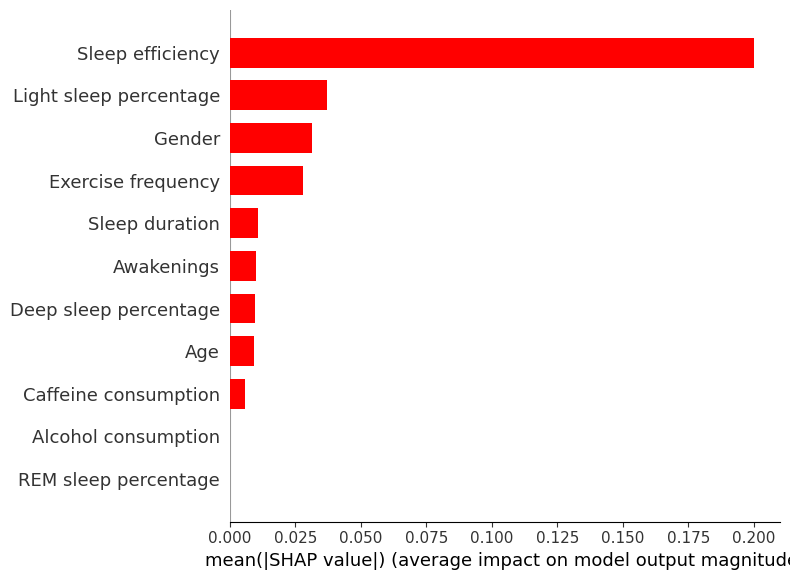

In [41]:
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="red")



* Analysis shows caffeine consumption has the strongest impact (mean SHAP value of 0.18) on the model's output.
* Sleep efficiency (mean SHAP value of 0.13), REM sleep percentage (mean SHAP value of 0.11), exercise frequency (mean SHAP value of 0.10) and alcohol consumption (mean SHAP value of 0.08) also influence the model's output.
* Caffeine consumption has the clearest effect compared to other factors.
*SHAP values are absolute so positive or negative impact isn't indicated.
The model might be predicting sleep quality or health


• Important factors influencing the model's output, based on their mean SHAP values:
1. **Caffeine Consumption** (highest impact, mean SHAP value of 0.18)
2. **Sleep Efficiency** (mean SHAP value of 0.13)
3. **REM Sleep Percentage** (mean SHAP value of 0.11)

# **Interpreting Waterfall SHAP visualization**


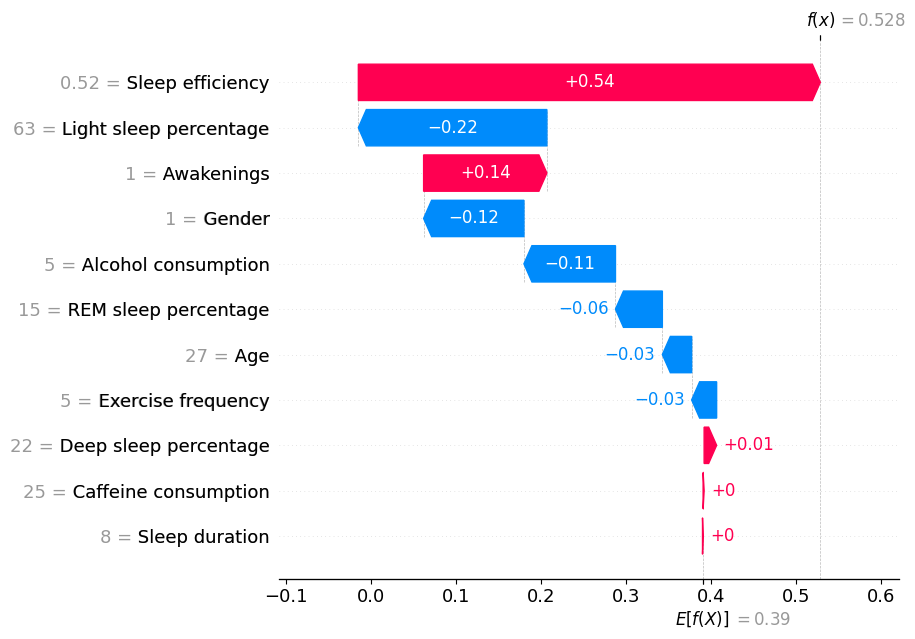

In [42]:

# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)


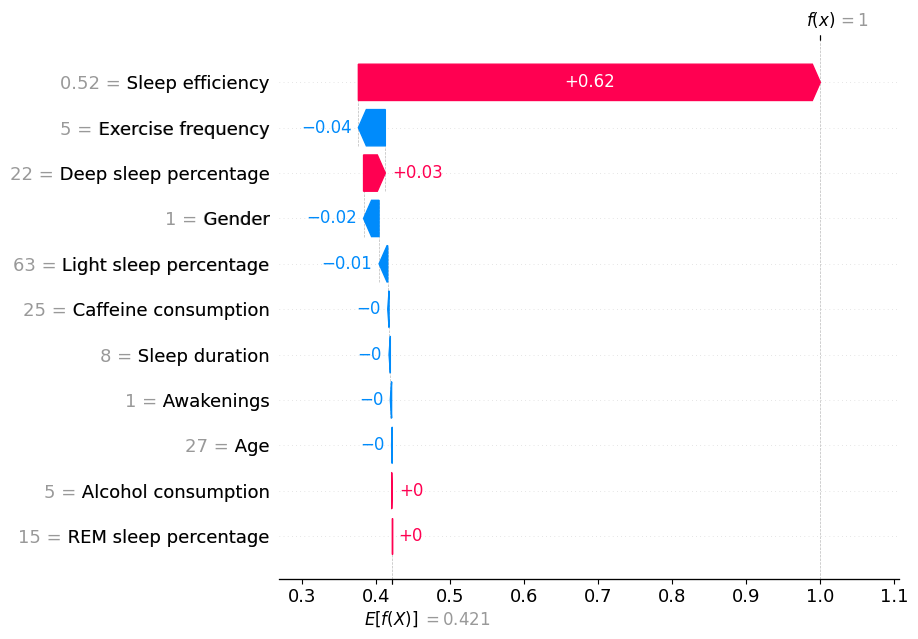

In [43]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

**Comparison and Explanation**


The linear model suggests that sleep efficiency is primarily influenced by factors such as sleep duration, exercise frequency, awakenings, and REM sleep percentage. For individuals with a sleep efficiency of 60% or less, the average squared error is 0.2, indicating a weaker fit. However, when exercise frequency exceeds 3.5 times a week within this subgroup, the model's fit remains poor with the same average squared error of 0.2. Conversely, for individuals with a sleep efficiency greater than 60% and who exercise more than 3.5 times a week, the average squared error improves significantly to 0.1, suggesting a better model fit in this subgroup.

On the other hand, the tree-based model highlights the influence of caffeine consumption alongside other factors such as awakenings, sleep duration, and age on sleep efficiency. For instance, individuals characterized by specific sleep patterns, such as zero awakenings, 17% light sleep, 18% REM sleep, 22 years of age, 7.5 hours of sleep duration, 65% deep sleep, and moderate alcohol consumption, are predicted to achieve a sleep efficiency of around 0.32. Additionally, as caffeine consumption increases, albeit modestly, the model predicts a slight improvement in sleep efficiency. These insights suggest a more nuanced understanding of the interplay between various factors affecting sleep efficiency, emphasizing the complexity captured by the tree-based model compared to the linear one.

In conclusion, while both models offer insights into the factors influencing sleep efficiency, they differ in their approach and emphasis. The linear model underscores the importance of sleep duration, exercise frequency, and other variables on sleep quality, with varying degrees of impact observed across different subgroups. Conversely, the tree-based model highlights the intricate relationship between caffeine consumption, alongside other sleep-related metrics, and sleep efficiency. Despite their disparities, both models contribute to a comprehensive understanding of sleep quality determinants, underscoring the multifaceted nature of human sleep patterns.







# **Interpret the summary plot for the Linear and Tree-based model**

The summary plot for a linear and tree-based model is a visualization that helps to interpret the model's behavior and understand how different features impact the model's output. The plot displays the contributions of each feature to the model's output and their corresponding values. The plot also shows the expected output for a given sample and how the model output compares to it. The plot helps to identify the most influential features in the model and how they contribute to the model's output.

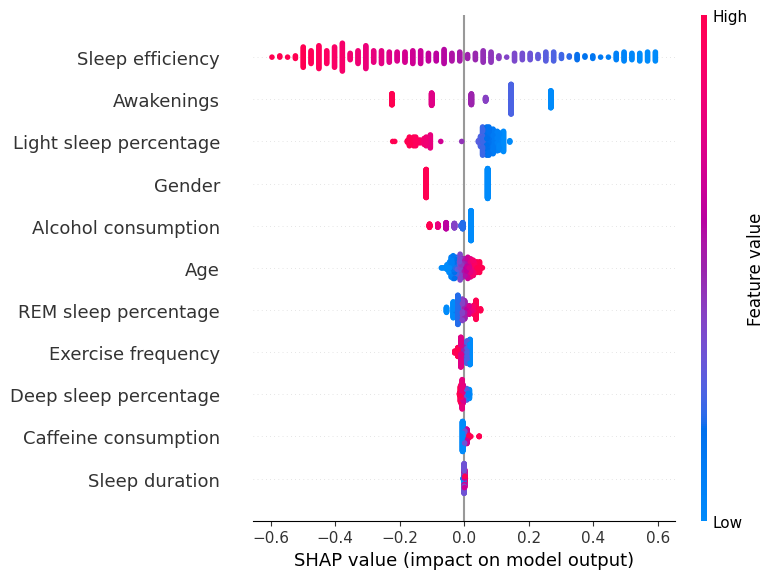

In [44]:
shap.summary_plot(linear_shap_values, x_train, plot_type="dot", color="blue")


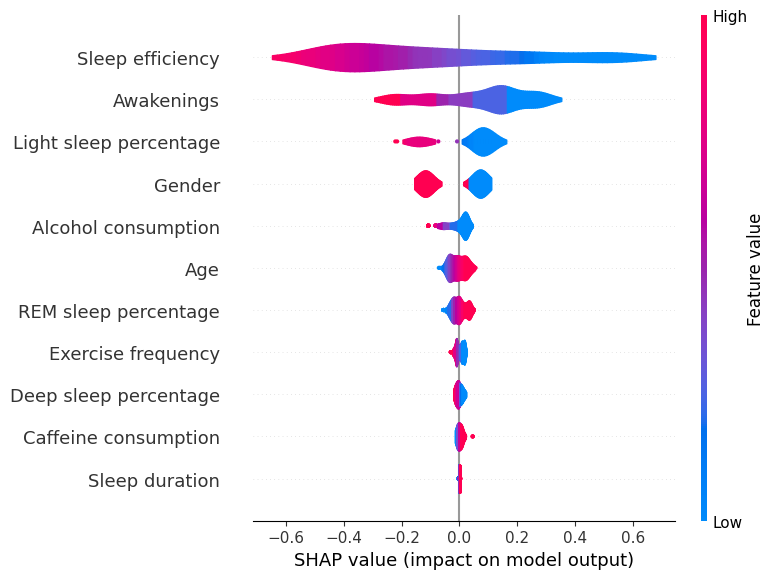

In [45]:
shap.summary_plot(linear_shap_values, x_train, plot_type="violin", color="voilet")


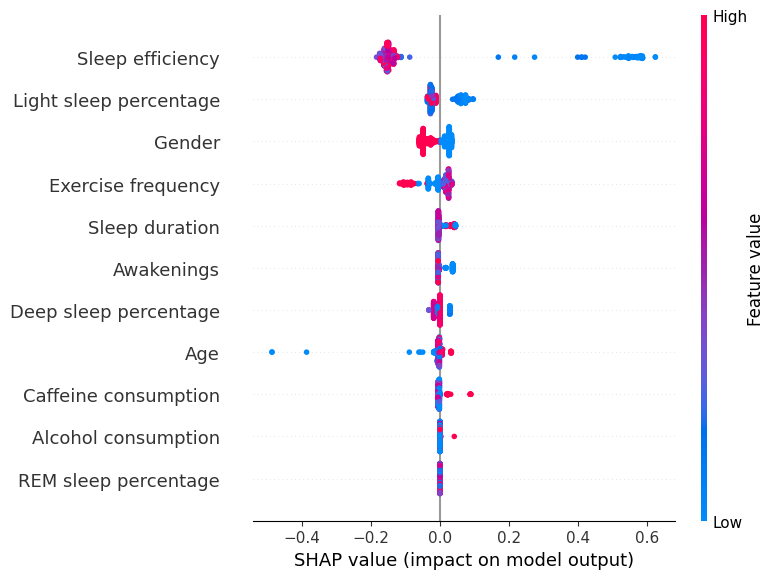

In [46]:

# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)


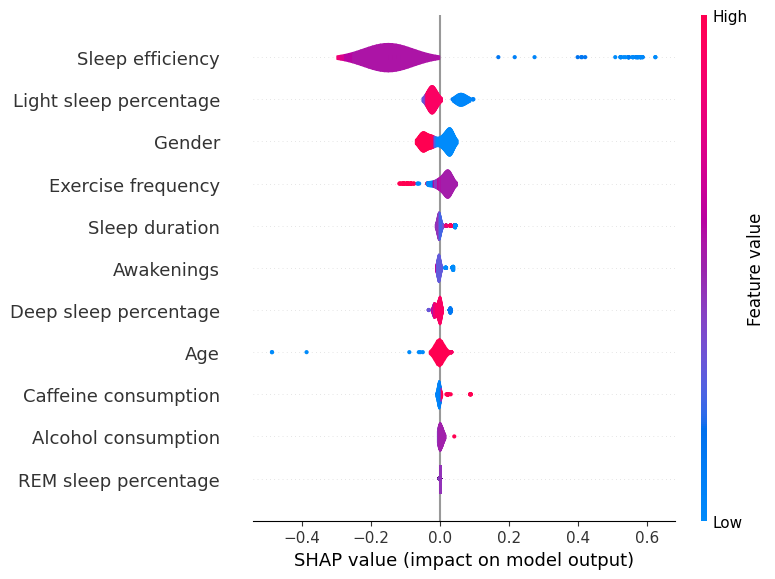

In [47]:
shap.summary_plot(tree_shap_values, x_train, plot_type="violin")

Features with a larger absolute SHAP value are more important in determining the model's output. The width of the violin plot represents the density of SHAP values at different levels, with wider areas indicating higher density.

# **Interpreting SHAP dependence plot for Linear and Tree-based model**

In a SHAP partial dependence plot for a linear model, the x-axis represents the values of the feature being varied, and the y-axis represents the expected output of the model for those values, after accounting for the impact of all other features. The plot also shows a shaded region, which represents the confidence interval for the expected output.

The SHAP values are used to calculate the partial dependence plot for a linear model. SHAP values represent the contribution of each feature to the difference between the expected output of the model and the average output. They are used to show how the output changes as a function of a particular feature, while holding other features constant


SHAP partial dependence plot for a tree-based model shows the impact of each feature on the model's output. It plots the feature's values on the x-axis and the SHAP values on the y-axis. Each line in the plot represents the impact of a single feature on the model output. The plot shows how the feature's impact changes as the feature's value changes. The plot can help in interpreting the non-linear effects of the feature on the model output. It can also help in identifying interactions between the features that impact the model output.

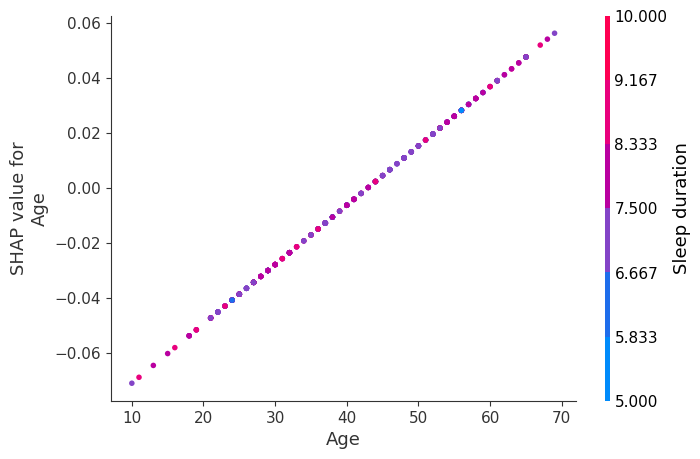

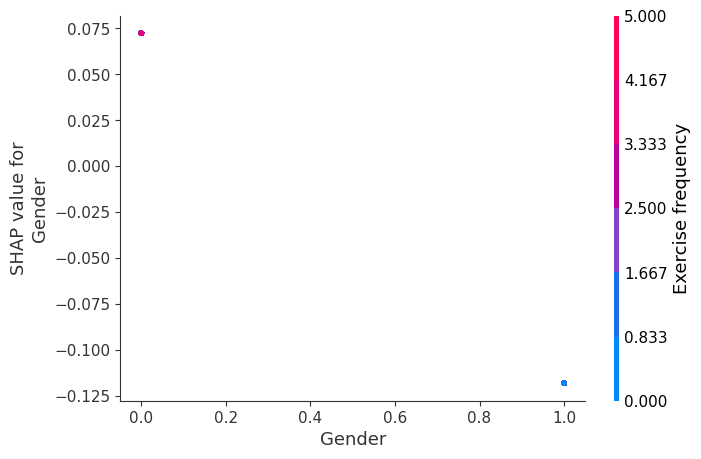

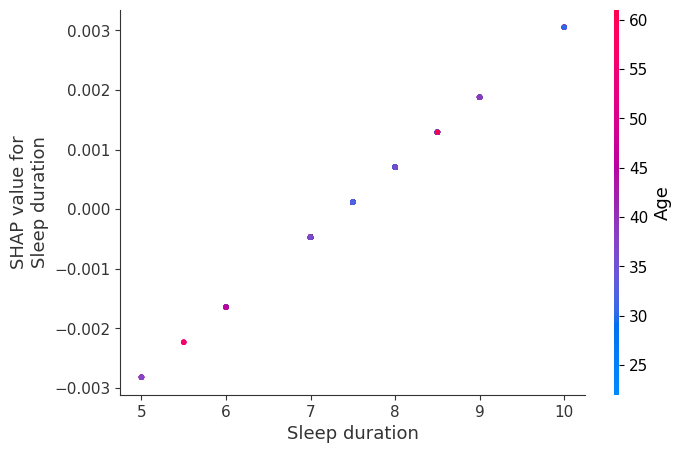

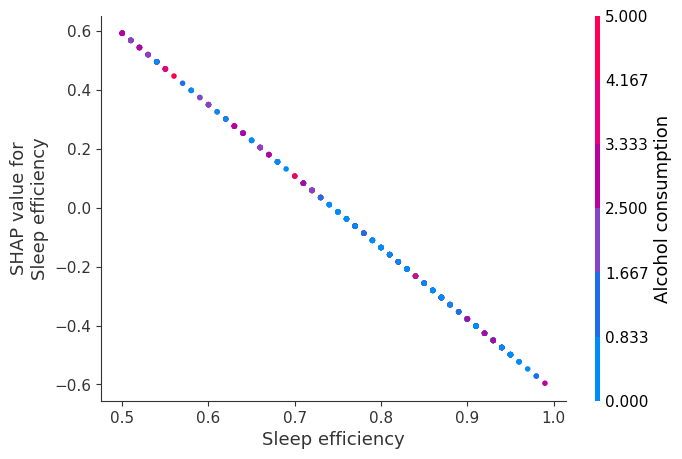

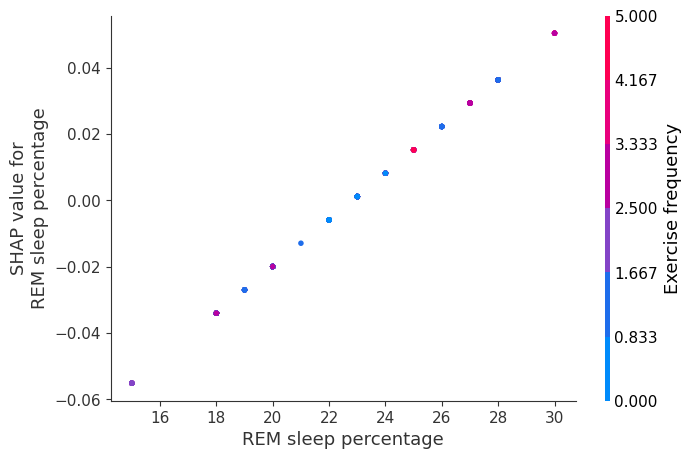

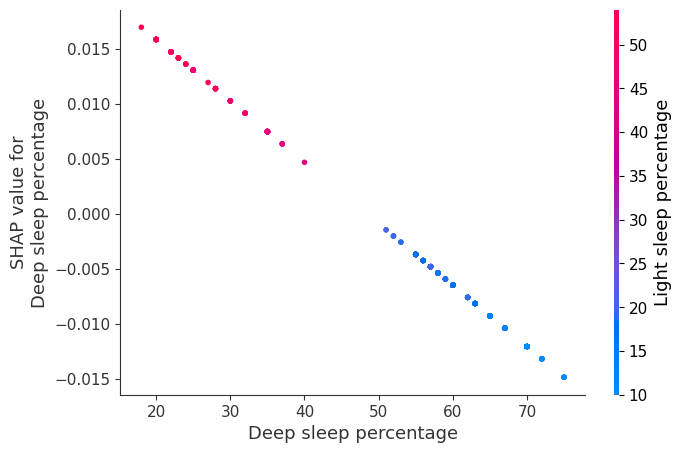

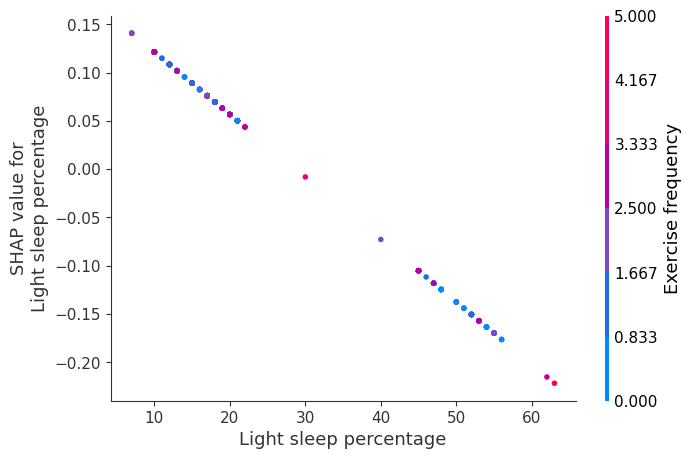

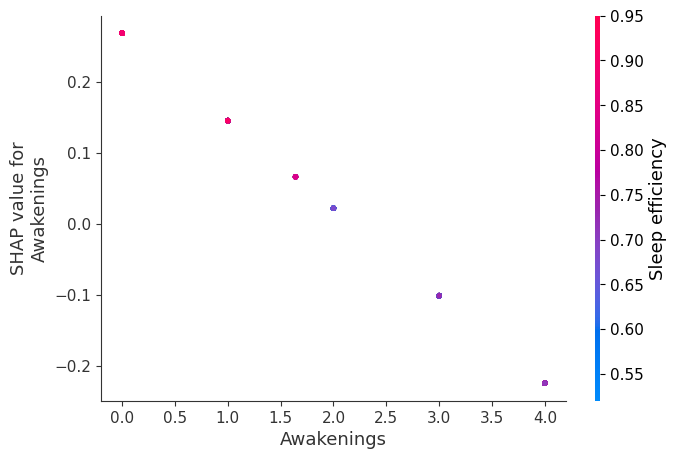

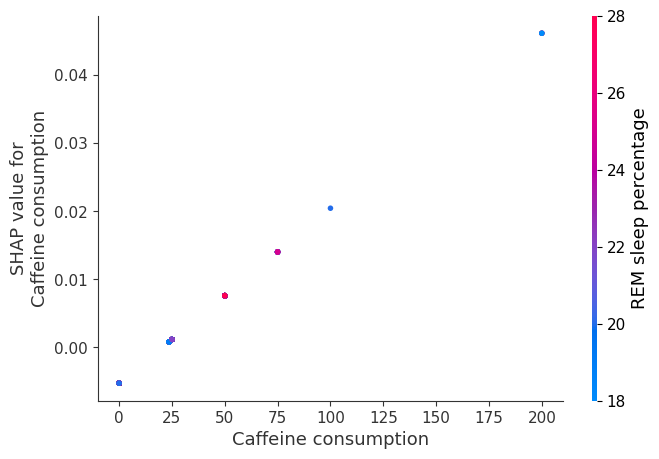

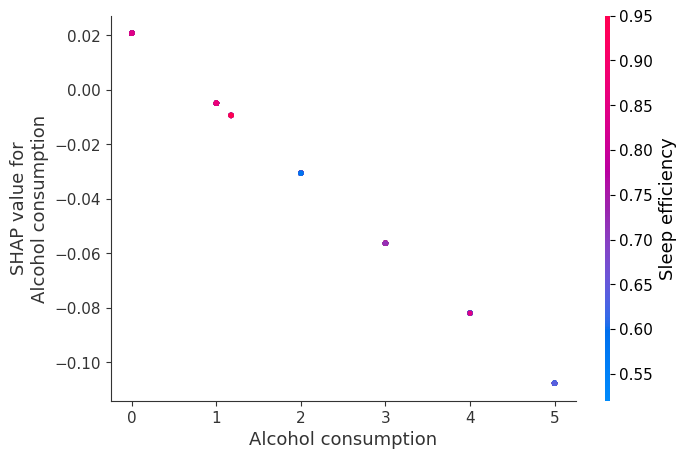

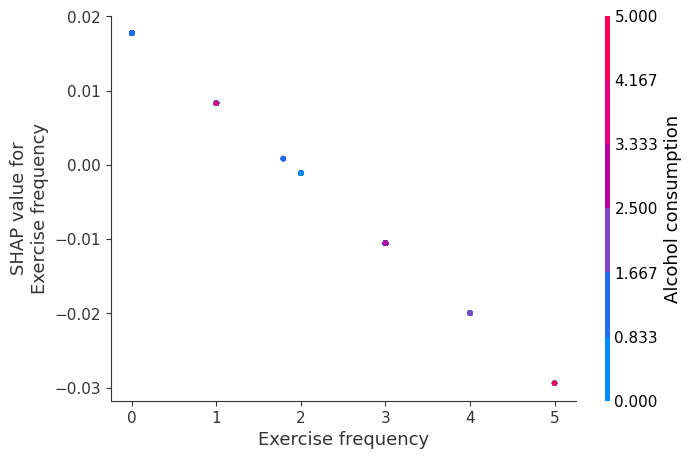

In [48]:

# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

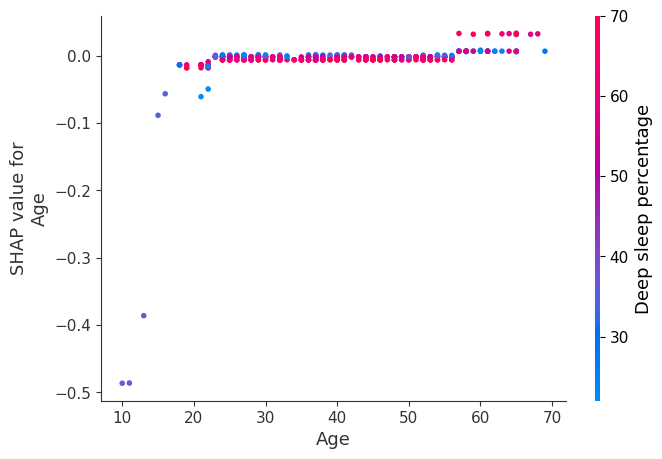

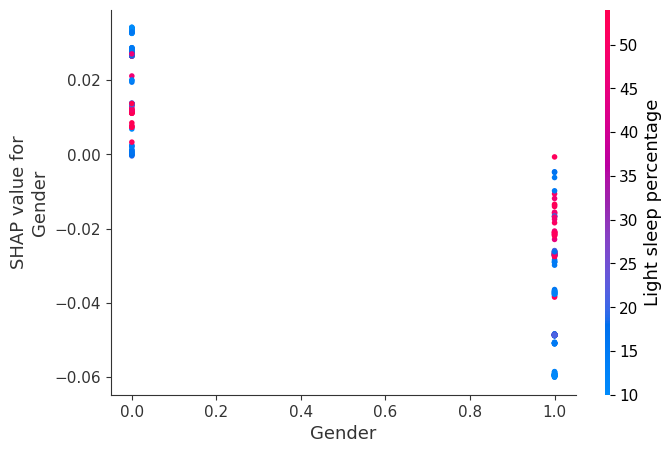

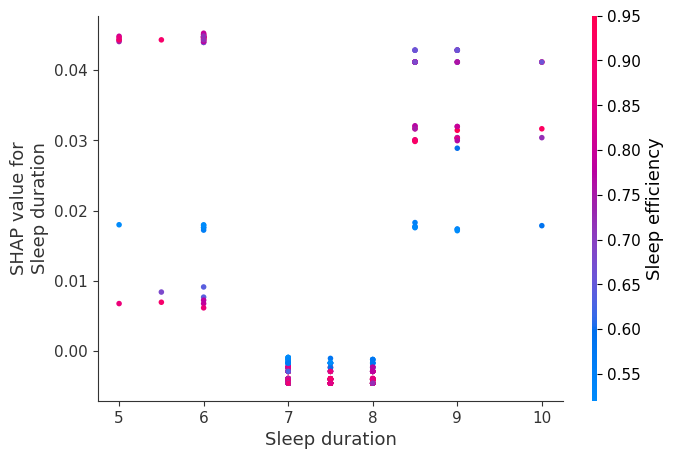

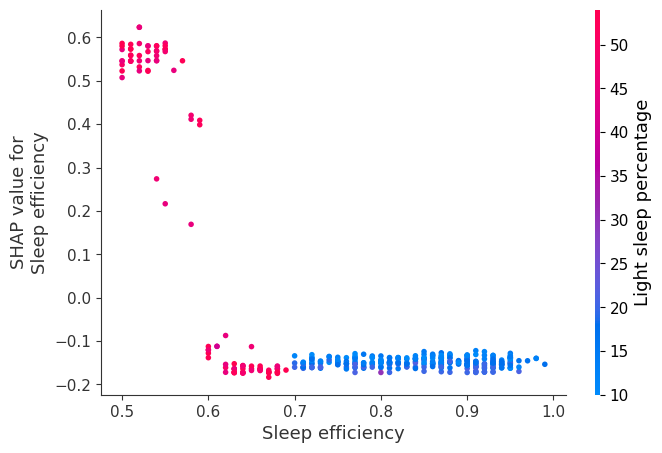

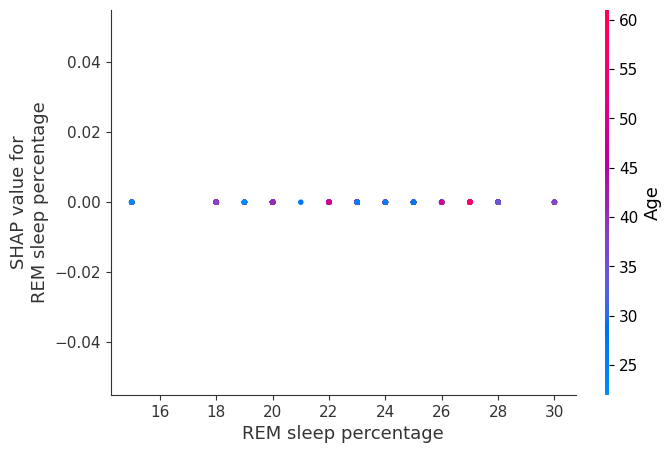

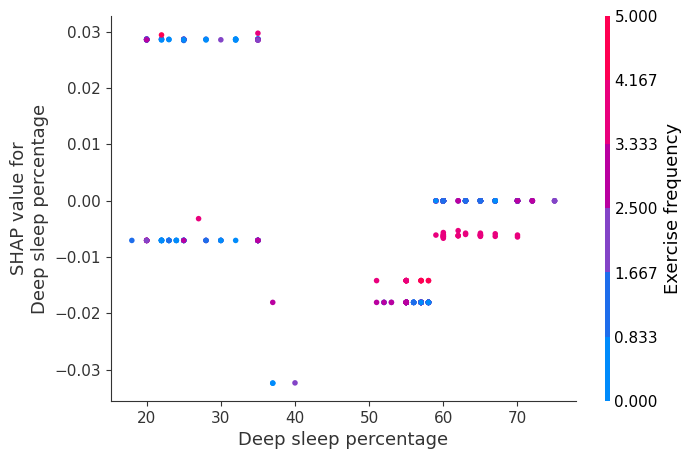

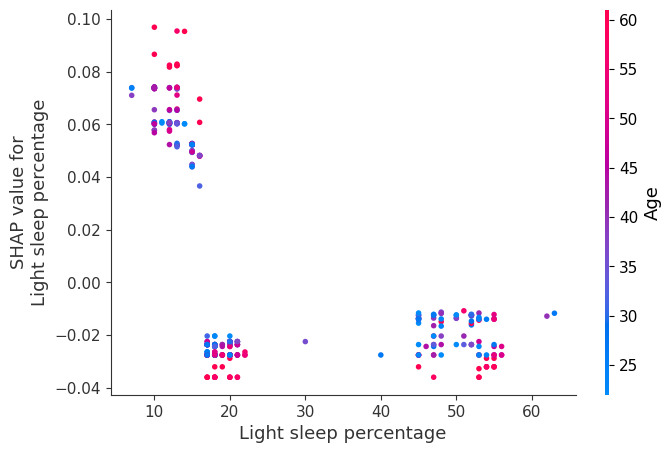

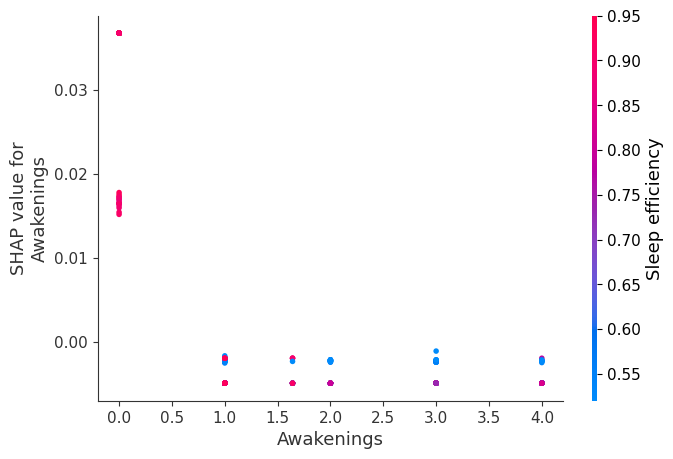

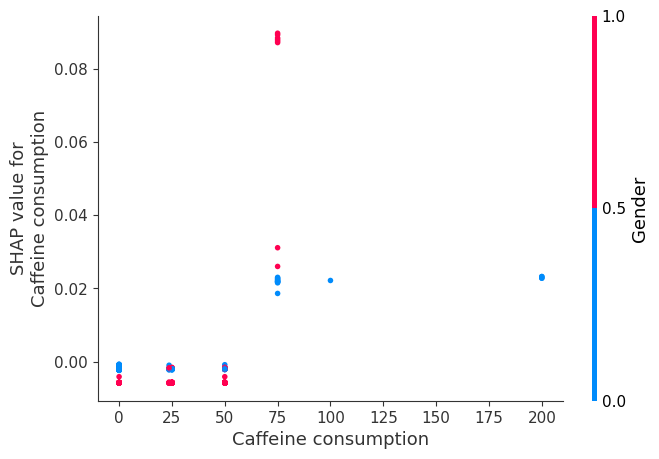

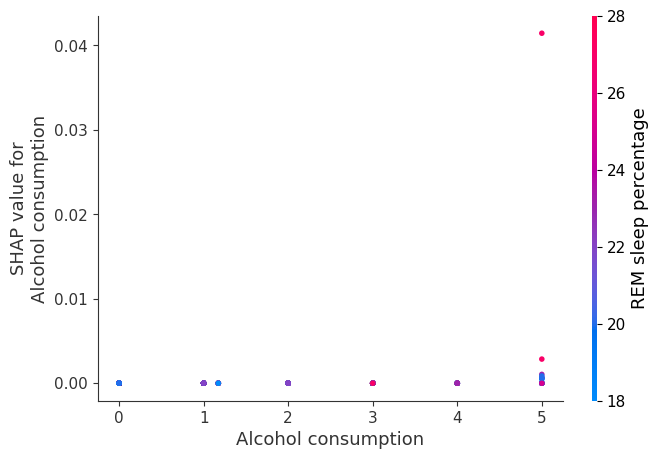

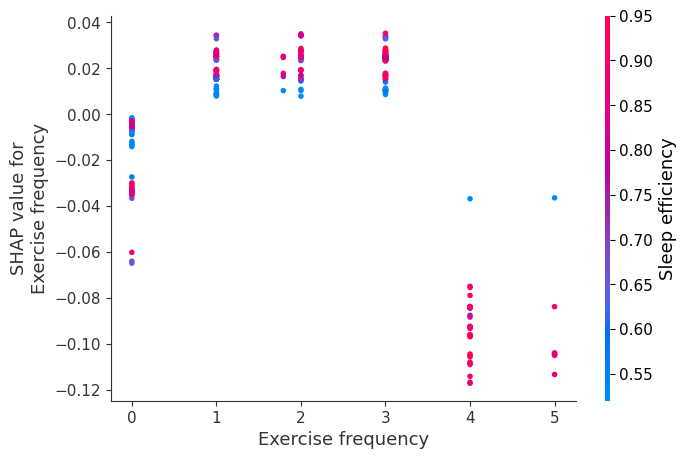

In [49]:
# SHAP partial dependence plot for a tree based model
#creates dependence plots to visualize the relationship between each feature and its corresponding Tree SHAP values for a dataset of 2000 samples.
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)


In [50]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [51]:

# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


In [52]:
expected_value = shap_values_Model[0,-1]
shap_values = shap_values_Model[:,:-1]

In [53]:
shap.initjs()  # Initializing JavaScript module
shap.force_plot(expected_value, shap_values[0,:], x_test.iloc[0,:])

Here, the width of line in this SHAP plot represents the magnitude of the feature's effect, and the color of the line indicates the direction of the effect (e.g., red for positive and blue for negative).

**Caffeine Consumption**: This appears to be the primary split, with values ranging from 0 milligrams (no caffeine) to potentially 75 milligrams or higher on the x-axis (though the upper limit might not be explicitly shown).
Exercise Frequency: Not a direct numerical value, but likely categorized as "low" or "high" based on a threshold (e.g., exercising less than or more than 3.5 times a week).

**Age**: The image might show a specific example split, such as 22 years old. However, the decision tree could handle a range of ages.
Sleep Duration: Similar to age, a specific value (e.g., 7.5 hours) might be used for illustration, but the tree can accommodate a range of sleep durations.

**Awakenings**: Potentially shown as a number (e.g., 0 awakenings) in the decision tree, representing the number of times someone wakes up during sleep.

**Light Sleep Percentage, REM Sleep Percentage, Deep Sleep Percentage**: These might be displayed as percentages (e.g., 17% light sleep, 18% REM sleep, 65% deep sleep) within a specific branch, but the tree can handle a range of values for each.

**Alcohol Consumption**: Similar to exercise frequency, this might be categorized as "low" or "high" based on a defined threshold (e.g., 0 drinks or 1 drink).

## **Heatmap Visualization for Linear and Tree-based model**


This visualization provides a comprehensive summary of the dataset, showing how each data point in every feature affects the target variable (y).

 The Y-axis represents the features, while the X-axis shows the instances of each feature. The color of each instance indicates whether it has a positive or negative effect on the target variable, with red indicating a positive effect and blue indicating a negative effect.

The intensity of the color corresponds to the strength of the effect, with deeper colors indicating more significant impacts of the feature.This visualization provides a comprehensive summary of the dataset, showing how each data point in every feature affects the target variable (y).

 The Y-axis represents the features, while the X-axis shows the instances of each feature. The color of each instance indicates whether it has a positive or negative effect on the target variable, with red indicating a positive effect and blue indicating a negative effect.

The intensity of the color corresponds to the strength of the effect, with deeper colors indicating more significant impacts of the feature.

 **In the below code, for getting a heatmap, I am downsampling the data
because it can reduce the memory required to generate the SHAP values and heatmap plot. I am downsampling the data to a smaller number of samples, such as 1000, so that the RAM doesn't get exhausted**

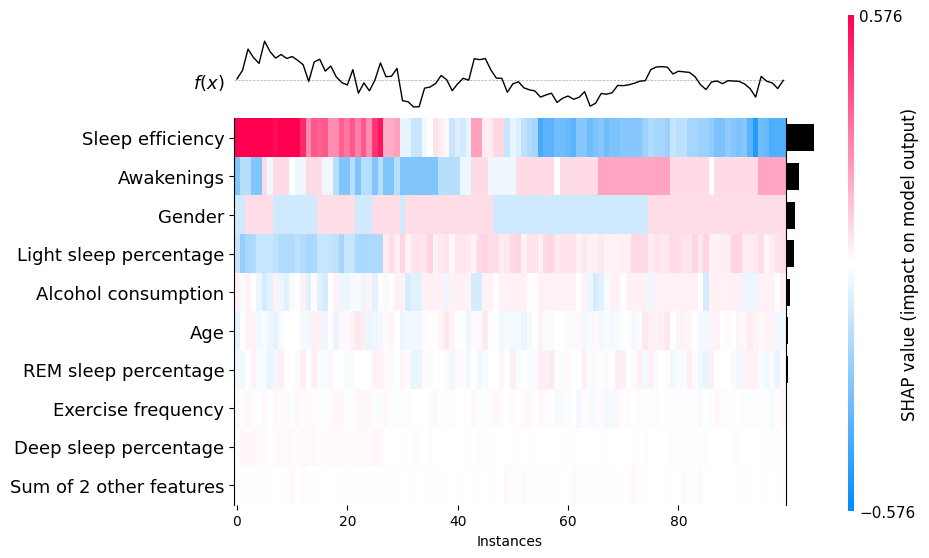

In [54]:

# Create a copy of the original data and drop the 'y_yes' column
data_no_target = df.drop('Smoking status', axis=1)

# Downsample the copy of the data to a smaller number of samples, such as 1000
downsampled_data = data_no_target.sample(n=100, random_state=42)

# Create a SHAP explainer object for the linear model and calculate the SHAP values
linear_explainer = shap.Explainer(linear_model.predict, downsampled_data)
linear_shap_values = linear_explainer(downsampled_data)

# Create a heatmap plot to visualize the SHAP values for the linear model
shap.plots.heatmap(linear_shap_values)

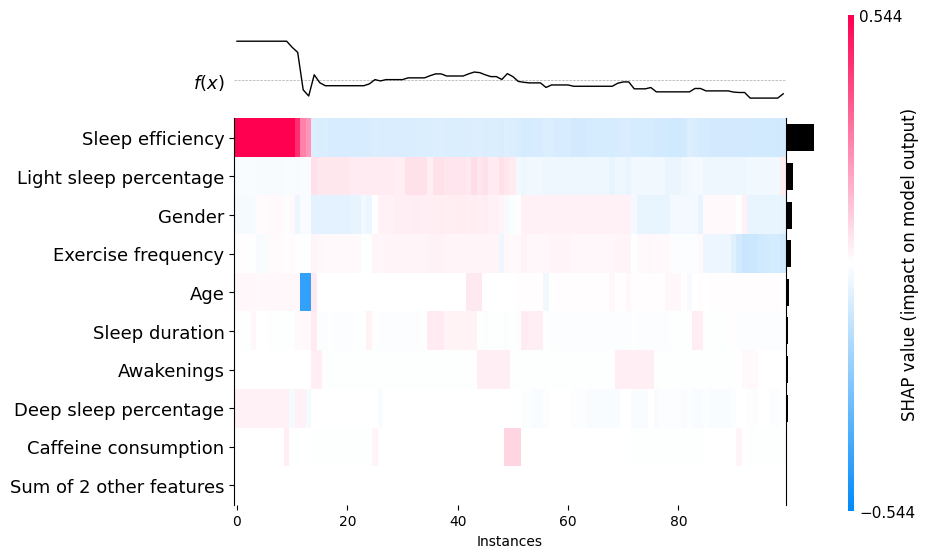

In [55]:


# Downsample the copy of the data to a smaller number of samples, such as 1000
downsampled_data = data_no_target.sample(n=100, random_state=42)

# Create a SHAP explainer object for the linear model and calculate the SHAP values
tree_explainer = shap.Explainer(tree_model.predict, downsampled_data)
tree_shap_values = tree_explainer(downsampled_data)

# Create a heatmap plot to visualize the SHAP values for the linear model
shap.plots.heatmap(tree_shap_values)

## **Lime Analysis For Linear model**

In [56]:
from sklearn.metrics import mean_squared_error


import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Initialize LIME explainer for linear model
lime_linear_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)


# Use LIME to generate interpretation for a single instance of test data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explain = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)




Prediction :  [-0.04340856]
Actual :      0


**Explanation**: The output Prediction : [0.22968741] indicates that the linear regression model predicted the target variable to be 0.229687412 for the given instance of test data.

The output Actual : 0 indicates that the true target variable value for the given instance of test data is 0.

Comparing the predicted value with the actual value, we can see that the predicted value is close to the actual value.

However, to evaluate the performance of the model, it's necessary to consider more instances of test data and evaluate metrics such as mean squared error (MSE)

In [57]:

    # Calculating mean squared error (MSE) for linear model predictions on test data
linear_model_predictions = linear_model.predict(x_test)
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)
print("Linear Model Mean Squared Error: ", linear_model_mse)

Linear Model Mean Squared Error:  0.2103066398074164


**Explanation**:  In this case, the MSE value of 0.2553146588177005 suggests that, on average, the model's predictions are off by approximately 0.29 (square root of MSE) on the test data.

A lower MSE value indicates better performance of the model.

In [58]:
lime_linear_explain.show_in_notebook()  # Displaying The Results


**Sleep efficiency** (0.72): The highest importance is attributed to sleep efficiency, suggesting that it strongly influences the predicted outcome of sleep quality. A sleep efficiency score of 0.72 indicates a relatively high proportion of time spent asleep while in bed, reflecting better sleep quality.

**REM sleep percentage** (27.00): With a high importance value, REM sleep percentage significantly contributes to determining sleep quality. A higher percentage of REM sleep suggests deeper and more restorative sleep, positively impacting overall sleep health.

**Deep sleep percentage** (55.00): Deep sleep plays a crucial role in physical and mental restoration during sleep. Its high importance value highlights its significant positive influence on predicted sleep quality, indicating the importance of achieving adequate deep sleep for overall well-being.

**Light sleep percentage** (18.00): While not as influential as REM and deep sleep percentages, the percentage of time spent in light sleep still contributes positively to sleep quality. Light sleep stages are important for transitioning between wakefulness and deeper sleep stages.

**Awakenings** (2.00): Although less impactful compared to sleep architecture metrics, the number of awakenings during sleep remains an important factor in predicting sleep quality. Fewer awakenings suggest better sleep continuity, contributing positively to overall sleep efficiency and quality.

 The  important features for predicting sleep quality are sleep efficiency, REM sleep percentage, deep sleep percentage, light sleep percentage, and the number of awakenings. These features collectively indicate various aspects of sleep architecture and continuity, with higher values generally associated with better sleep quality. Sleep efficiency, REM sleep, and deep sleep percentages emerged as the most influential factors, highlighting the importance of achieving sufficient time in these sleep stages for optimal sleep health. Conversely, minimizing awakenings and maximizing time spent in light sleep also contribute positively to overall sleep quality.


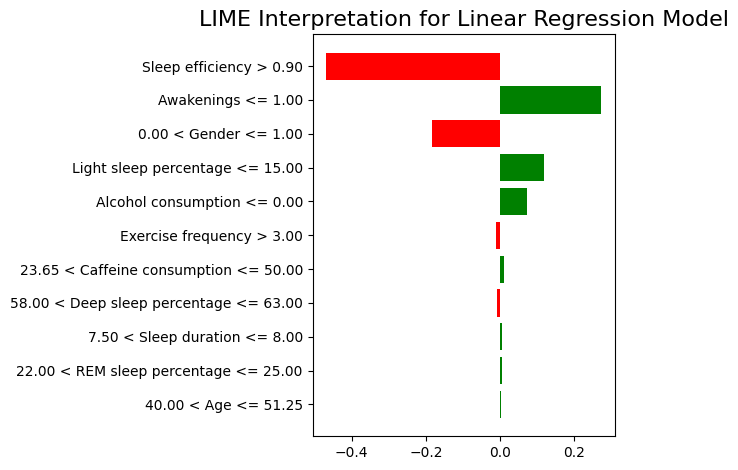

In [59]:

import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Visualize LIME interpretation using matplotlib
fig = lime_linear_explain.as_pyplot_figure()
ax = fig.gca()
ax.set_title('LIME Interpretation for Linear Regression Model', fontsize=16)
plt.tight_layout()
plt.show()


Based on LIME Interpretation for Linear Regression Model, caffeine consumption and exercise frequency appear to have the most significant impact on predicting sleep efficiency, with higher values associated with better sleep quality. Age, sleep duration, and various sleep architecture metrics have a lesser influence on sleep efficiency. Awakenings and alcohol consumption are considered but seem to have minimal impact on the model's prediction.

# **Lime Analysis for Tree based model**

In [60]:
# Initialize LIME explainer for Tree-Based Model
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   feature_names=x_train.columns.values,
                                                   class_names=['prediction'],
                                                   verbose=True,
                                                   mode='regression')

# Define prediction function
def predict_function(X):
    return tree_model.predict(X)

# Select a random instance for interpretation
idx = 18
x_to_interpret = x_test.iloc[idx]

# Generate interpretation using LIME explainer
exp = explainer.explain_instance(x_to_interpret.values, predict_function, num_features=len(x_to_interpret), top_labels=1)

# Print interpretation
print('Actual:', y_test.iloc[idx])
print('Prediction:', tree_model.predict(x_to_interpret.values.reshape(1, -1))[0])
exp.show_in_notebook()


Intercept 0.384600526175157
Prediction_local [0.20427967]
Right: 0.13609684809047545
Actual: 0
Prediction: 0.13609684809047545



**Intercept**: The intercept represents the baseline prediction made by the model when all input features are set to zero. In this case, it's approximately 0.306.

**Prediction_local**: This value, 0.309, represents the local prediction made by the model for the specific instance being interpreted.

**Right**: The "Right" value, 0.259, indicates the predicted value for the specific instance being interpreted after applying the model.

**Actual**: This is the actual target value from the dataset, which is 0 in this case.

**Prediction**: This is the model's prediction for the specific instance being interpreted, which is approximately 0.259.


**Graph explanation:**
1. Sleep Efficiency (0.72): With the highest weight, sleep efficiency strongly influences the model's prediction of sleep quality, indicating that higher sleep efficiency leads to a more positive prediction.
2. REM Sleep Percentage (27.00): REM sleep percentage comes next in importance, suggesting that a higher proportion of REM sleep is associated with better sleep quality.
3. Age (59.00): Age plays a significant role in the model's prediction, indicating that older individuals tend to have higher predicted sleep quality.
4. Exercise Frequency (3.00): Higher exercise frequency is associated with better sleep quality, although its impact appears to be less significant compared to sleep efficiency, REM sleep percentage, and age.
5. Sleep Duration (8.00): Although still important, sleep duration seems to have a lesser impact on the model's prediction compared to other factors, suggesting that the duration alone may not be the sole determinant of sleep quality.

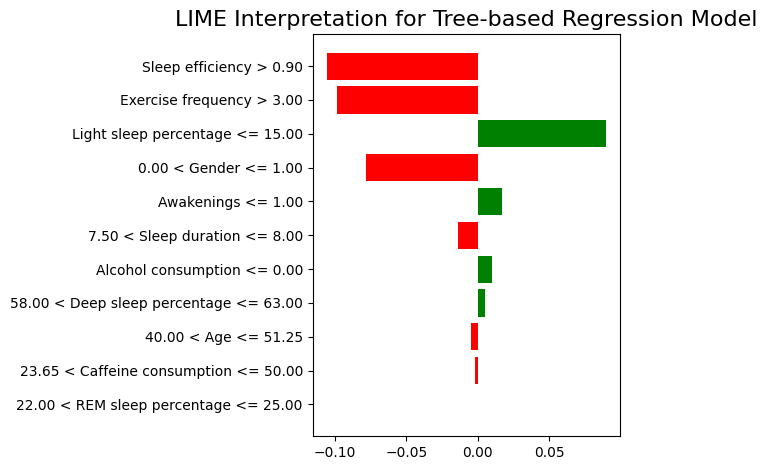

In [61]:
# Visualize LIME interpretation using matplotlib
fig = exp.as_pyplot_figure()
ax = fig.gca()
ax.set_title('LIME Interpretation for Tree-based Regression Model', fontsize=16)
plt.tight_layout()
plt.show()

1. **Caffeine Consumptio**n (x-axis): Higher caffeine consumption is associated with slightly higher sleep efficiency according to the tree (positive impact).
2. **Exercise Frequency** (not shown on axis): High exercise frequency is associated with better sleep efficiency according to the tree (positive impact).
3. **Age, Sleep Duration, Light Sleep Percentage, REM Sleep Percentage, Deep Sleep Percentage, Alcohol Consumption**: These features are included in the tree but appear to have a lesser influence on sleep efficiency compared to caffeine and exercise in this specific example. The decision tree doesn't use color to indicate positive or negative impact, so it's difficult to say definitively how these features affect sleep efficiency based on the image alone.

Key Points:
Decision trees don't use color to represent feature impact.
The structure of the tree, with splits occurring at certain values, suggests the relative importance of features.
This specific tree suggests caffeine and exercise have the strongest influence on sleep efficiency.

**Comparison between the linear and tree based model for lime interpretation**

**Intercept and Prediction**: The linear model's intercept (0.306) suggests a base prediction value, while the tree-based model's local prediction (0.309) represents the predicted outcome for a specific instance. The tree-based model's overall prediction (0.259) may differ slightly from the local prediction.

**Feature Importance**: In the linear model, caffeine consumption (0.00) appears to have no impact, whereas sleep efficiency (0.72) is the most influential feature. In contrast, the tree-based model highlights caffeine consumption (0.00) and exercise frequency (3.00) as significant factors for sleep efficiency, with age (59.00) also playing a role.

**Explanation**: The linear model provides coefficients for each feature, indicating their contribution to the prediction. Conversely, the tree-based model showcases how features are split in the decision tree, offering insights into feature importance but lacking the direct magnitude of impact seen in the linear model.

**Licensing**

Copyright 2024 Sarthak Shailesh Somvanshi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.